# Определение показателей неэффективных операторов

**Ссылка на дашборд**

https://public.tableau.com/app/profile/dmitry7098/viz/_16274187113510/Dashboard?publish=yes

**Ссылка на презентацию**

https://yadi.sk/i/T1VxoqOypRMWdA

<div class="alert alert-block alert-warning">
    
<h2> Проведем исследовательский анализ данных</h2>
</div>

<div style="border:solid green 2px; padding: 20px">

**Загрузим данные и изучим общую информацию**
- Выгрузим датасет;
- Определим дубликаты;
- Заполним пропуски;
- Исправим типы данных;
- Исправим ошибки в данных; 
- Найдем аномальные значения; 
- Добавим необходимые столбцы для анализа

**Посмотрим на распределение звонков во времени**

- Определим интервал времени анализа данных; 
- Построим графики и сделаем выводы
    
**Определим, какому количеству клиентов будет интересна наша услуга**

**Разделим датасет на 4 таблицы и изучим данные**

- Определим колл-центры, которые имеют ежедневную загрузку по звонкам; 
- Изучим данные для входящих звонков в колл-центр от клиентов и изучим принятые звонки и пропущенные. построим графики, определим доли;
- Изучим данные для входящих звонков в колл-центр от клиентов и изучим исходящие звонки и пропущенные. построим графики, определим доли;
- Изучим данные для входящих звонков в колл-центр от операторов и изучим принятые звонки и пропущенные. построим графики, определим доли;
- Изучим данные для входящих звонков в колл-центр от операторов и изучим исходящие звонки и пропущенные. построим графики, определим доли

**Сформулируем общий вывод**
    
</div>                                                    

## Загрузим данные и изучим общую информацию

In [1]:
!pip install --upgrade numpy

     |████████████████████████████████| 17.7 MB 1.2 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.1
    Uninstalling numpy-1.21.1:
      Successfully uninstalled numpy-1.21.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 1.25.1 which is incompatible.
numba 0.56.0 requires numpy<1.23,>=1.18, but you have numpy 1.25.1 which is incompatible.


In [ ]:
!pip install --upgrade pandas

     |████████████████████████████████| 12.4 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 247 kB 63.5 MB/s eta 0:00:01
     |████████████████████████████████| 341 kB 68.0 MB/s eta 0:00:01
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.1
    Uninstalling python-dateutil-2.8.1:
      Successfully uninstalled python-dateutil-2.8.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.2.4
    Uninstalling pandas-1.2.4:


In [ ]:
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt

import math
from scipy import stats

from datetime import datetime, timedelta

import warnings

warnings.filterwarnings('ignore')

In [ ]:
#data = pd.read_csv("E:/YP/VP/ID/telecom/telecom_dataset.csv")
data = pd.read_csv("/datasets/telecom_dataset.csv")
data.info()

In [5]:
data.sample(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
5933,166536,2019-10-29 00:00:00+03:00,out,False,925826.0,False,8,483,562
5630,166520,2019-11-27 00:00:00+03:00,out,False,893674.0,False,36,1238,1797
44221,168025,2019-10-16 00:00:00+03:00,in,False,938022.0,False,4,218,267
37477,167626,2019-10-14 00:00:00+03:00,out,False,919302.0,True,57,0,2013
50639,168252,2019-11-19 00:00:00+03:00,out,False,940588.0,True,2,0,70


В столбце internal есть 117 пропущенных значений, посмотрим на них

In [6]:
internal = data.query('internal != False and internal != True')
internal.sample(10)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
29989,167272,2019-10-09 00:00:00+03:00,in,NaN,912684.0,False,1,123,175
41385,167852,2019-10-25 00:00:00+03:00,in,NaN,932798.0,False,1,28,39
39518,167747,2019-10-07 00:00:00+03:00,in,NaN,NaN,True,1,0,9
40602,167827,2019-10-21 00:00:00+03:00,in,NaN,929424.0,False,1,13,14
15093,166884,2019-09-17 00:00:00+03:00,in,NaN,NaN,True,21,0,9
43860,168018,2019-11-28 00:00:00+03:00,in,NaN,NaN,True,1,0,2
29887,167264,2019-11-15 00:00:00+03:00,in,NaN,919552.0,False,1,125,158
23183,167078,2019-11-13 00:00:00+03:00,in,NaN,935348.0,False,2,73,84
37964,167650,2019-10-01 00:00:00+03:00,in,NaN,921318.0,False,1,124,131
29912,167264,2019-11-21 00:00:00+03:00,in,NaN,919552.0,False,1,55,80


В основном это входящие вызовы. Сгруппируем данные и посмотрим распределение входящих по признаку - вляется ли звонок внутренним звонком между операторами клиента

In [7]:
internal_group = data.groupby(['direction', 'internal']).agg({'calls_count': 'sum'})
internal_group

calls_count
direction internal             
in        False          214896
          True             1739
out       False          655737
          True            14149

Скорее всего наши звонки являются входящими вызовами и не является внутренним звонком между операторами клиента. Присвоим пропущенным значениям False	

In [8]:
data['internal'] = data['internal'].fillna(False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53902 non-null  bool   
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(2), float64(1), int64(4), object(2)
memory usage: 3.0+ MB


Определим дубликаты

In [9]:
data.duplicated().sum()

4900

В датасете 4900 дубликатов, что составляет 9% от всех данных. Удалим дубликаты

In [10]:
data = data.drop_duplicates().reset_index(drop=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49002 entries, 0 to 49001
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              49002 non-null  int64  
 1   date                 49002 non-null  object 
 2   direction            49002 non-null  object 
 3   internal             49002 non-null  bool   
 4   operator_id          41546 non-null  float64
 5   is_missed_call       49002 non-null  bool   
 6   calls_count          49002 non-null  int64  
 7   call_duration        49002 non-null  int64  
 8   total_call_duration  49002 non-null  int64  
dtypes: bool(2), float64(1), int64(4), object(2)
memory usage: 2.7+ MB


Присвоим столбцу date тип дата

In [12]:
data['date'] = pd.to_datetime(data['date'])

Добавим столбцы с днем - day и неделей - week

In [13]:
data['day'] = data['date'].dt.day
data['week'] = data['date'].dt.week
data.head(5)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,day,week
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4,4,31
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,5,32
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,5,32
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,5,32
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,5,32


Поскольку данные представлены за один день, отбросим лишнее

In [14]:
data['date'] = data['date'].dt.date

Определим ошибки в данных

Посмотрим на пропущенные звонки. Длительность звонка в столбце call_duration должна равняться 0

In [15]:
is_missed_call_true = data.query('is_missed_call != False')

In [16]:
is_missed_call_true['call_duration'].sum()

23761

23761 минут разговора оператора попали в пропущенные значения

In [17]:
is_missed_call_true_0 = is_missed_call_true.query('is_missed_call == True and call_duration != 0')
is_missed_call_true_0

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,day,week
1471,166405,2019-11-19,in,False,939478.0,True,1,165,173,19,47
1498,166405,2019-11-21,in,False,882686.0,True,1,1,5,21,47
1518,166405,2019-11-22,in,False,882686.0,True,1,1,5,22,47
2089,166407,2019-09-23,in,False,888534.0,True,1,133,156,23,39
2625,166482,2019-11-05,in,False,934074.0,True,1,1,15,5,45
...,...,...,...,...,...,...,...,...,...,...,...
46924,168336,2019-11-01,in,False,947304.0,True,1,1,20,1,44
46981,168336,2019-11-12,in,False,947304.0,True,1,69,72,12,46
47007,168336,2019-11-15,in,False,947304.0,True,1,46,49,15,46
47149,168336,2019-11-27,in,False,958416.0,True,1,40,65,27,48


296 строк с ошибочными данными, удалим их

Присвоим значение 1 ошибочным строкам, чтобы отделить их

In [18]:
def m_call(data):
    is_missed_call = data['is_missed_call']
    call_duration = data['call_duration']
    
    if is_missed_call == True and call_duration != 0:
            return 1
             
    return 2


row_mes = ['is_missed_call', 'call_duration']
row = pd.Series(index=row_mes)
data['missed_call'] = data.apply(m_call, axis=1)
data

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,day,week,missed_call
0,166377,2019-08-04,in,False,NaN,True,2,0,4,4,31,2
1,166377,2019-08-05,out,True,880022.0,True,3,0,5,5,32,2
2,166377,2019-08-05,out,True,880020.0,True,1,0,1,5,32,2
3,166377,2019-08-05,out,True,880020.0,False,1,10,18,5,32,2
4,166377,2019-08-05,out,False,880022.0,True,3,0,25,5,32,2
...,...,...,...,...,...,...,...,...,...,...,...,...
48997,168606,2019-11-10,out,True,957922.0,False,1,0,25,10,45,2
48998,168606,2019-11-10,out,True,957922.0,True,1,0,38,10,45,2
48999,168606,2019-11-11,out,True,957922.0,False,2,479,501,11,46,2
49000,168606,2019-11-15,out,True,957922.0,False,4,3130,3190,15,46,2


In [19]:
data = data.query('missed_call != 1')
data

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,day,week,missed_call
0,166377,2019-08-04,in,False,NaN,True,2,0,4,4,31,2
1,166377,2019-08-05,out,True,880022.0,True,3,0,5,5,32,2
2,166377,2019-08-05,out,True,880020.0,True,1,0,1,5,32,2
3,166377,2019-08-05,out,True,880020.0,False,1,10,18,5,32,2
4,166377,2019-08-05,out,False,880022.0,True,3,0,25,5,32,2
...,...,...,...,...,...,...,...,...,...,...,...,...
48997,168606,2019-11-10,out,True,957922.0,False,1,0,25,10,45,2
48998,168606,2019-11-10,out,True,957922.0,True,1,0,38,10,45,2
48999,168606,2019-11-11,out,True,957922.0,False,2,479,501,11,46,2
49000,168606,2019-11-15,out,True,957922.0,False,4,3130,3190,15,46,2


Посмотрим на принятые звонки. Длительность звонка в столбце call_duration не должна равняться 0

In [20]:
is_missed_call_False = data.query('is_missed_call == False')

In [21]:
is_missed_call_False['call_duration'].min()

0

In [22]:
is_missed_call_False_0 = is_missed_call_False.query('is_missed_call != True and call_duration == 0')
is_missed_call_False_0

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,day,week,missed_call
1422,166405,2019-11-16,out,False,902532.0,False,1,0,27,16,46,2
2684,166485,2019-09-03,out,True,887276.0,False,1,0,4,3,36,2
8637,166658,2019-11-06,out,True,890410.0,False,1,0,0,6,45,2
9292,166678,2019-09-04,out,True,888868.0,False,1,0,5,4,36,2
13497,166874,2019-10-05,out,False,893700.0,False,2,0,83,5,40,2
19598,167035,2019-10-25,out,False,923528.0,False,1,0,9,25,43,2
20512,167061,2019-09-01,out,True,901038.0,False,1,0,7,1,35,2
20596,167071,2019-09-24,out,False,913942.0,False,1,0,23,24,39,2
21002,167078,2019-10-23,out,True,935348.0,False,1,0,0,23,43,2
25324,167176,2019-10-18,out,True,907964.0,False,1,0,3,18,42,2


Удалим 18 ошибочных столбцов

In [23]:
def call_true (data):
    is_missed_call = data['is_missed_call']
    call_duration = data['call_duration']
    
    if is_missed_call == False and call_duration == 0:
            return 1
             
    return 2


row_mes = ['is_missed_call', 'call_duration']
row = pd.Series(index=row_mes)
data['call_true'] = data.apply(call_true, axis=1)

In [24]:
data = data.query('call_true != 1')
data

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,day,week,missed_call,call_true
0,166377,2019-08-04,in,False,NaN,True,2,0,4,4,31,2,2
1,166377,2019-08-05,out,True,880022.0,True,3,0,5,5,32,2,2
2,166377,2019-08-05,out,True,880020.0,True,1,0,1,5,32,2,2
3,166377,2019-08-05,out,True,880020.0,False,1,10,18,5,32,2,2
4,166377,2019-08-05,out,False,880022.0,True,3,0,25,5,32,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48996,168606,2019-11-09,out,False,957922.0,False,4,551,593,9,45,2,2
48998,168606,2019-11-10,out,True,957922.0,True,1,0,38,10,45,2,2
48999,168606,2019-11-11,out,True,957922.0,False,2,479,501,11,46,2,2
49000,168606,2019-11-15,out,True,957922.0,False,4,3130,3190,15,46,2,2


## Посмотрим на распределение звонков во времени

***Определим интервал времени анализа данных***

Посмотрим на начало и окончание данных по времени

In [25]:
data['date'].min()

datetime.date(2019, 8, 2)

In [26]:
data['date'].max()

datetime.date(2019, 11, 28)

In [27]:
pd.to_datetime(data['date']).describe()

count                   48689
unique                    119
top       2019-11-25 00:00:00
freq                     1099
first     2019-08-02 00:00:00
last      2019-11-28 00:00:00
Name: date, dtype: object

Поскольку обработка звонков в колл-центре является основной функцией, то посмотрим на распределение звонков во времени

In [28]:
uid_call_day = data.groupby(['date', 'direction']).agg({'calls_count': 'sum'}).reset_index() 
uid_call_day

,date,direction,calls_count
0,2019-08-02,in,2
1,2019-08-02,out,19
2,2019-08-03,in,3
3,2019-08-03,out,26
4,2019-08-04,in,2
...,...,...,...
232,2019-11-26,out,10529
233,2019-11-27,in,4368
234,2019-11-27,out,10403
235,2019-11-28,in,4469


In [29]:
call_in = uid_call_day.query('direction == "in"')
call_out = uid_call_day.query('direction == "out"')

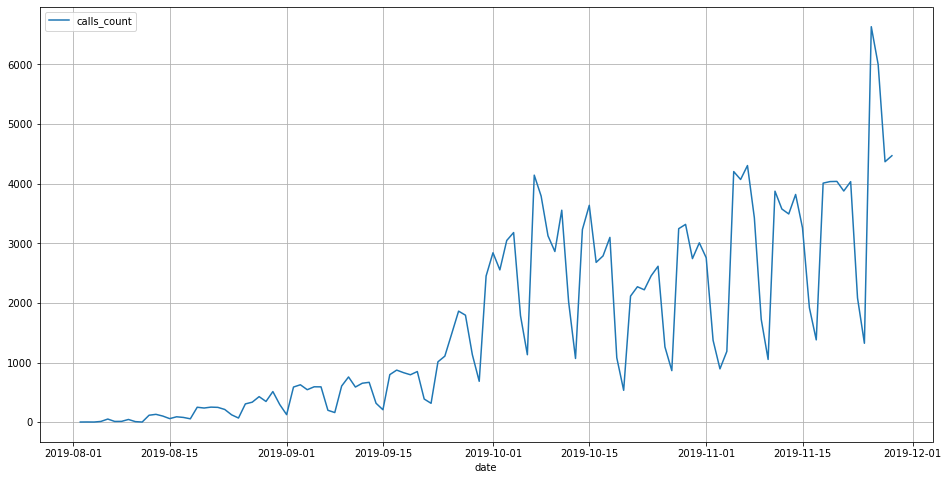

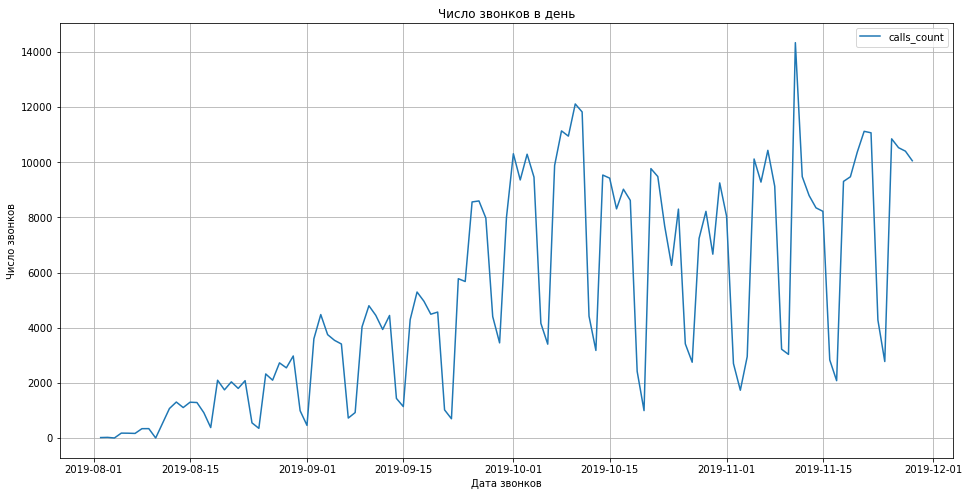

In [30]:
call_in.plot(y='calls_count', x='date', grid=True, figsize=(16, 8))
call_out.plot(y='calls_count', x='date', grid=True, figsize=(16, 8))
plt.title('Число звонков в день')
plt.xlabel('Дата звонков')
plt.ylabel('Число звонков');

Во входящих звонках и в исходящих, количество звонков с нуля от 02.08 до 40-й недели плавно увеличивается, с 40-й недели мы выходи на равномерные показатели. Начнем исследовать данные с 40-й недели 

In [31]:
df = data.query('week >= 40')
df

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,day,week,missed_call,call_true
258,166377,2019-09-30,out,False,880020.0,False,4,724,749,30,40,2,2
259,166377,2019-09-30,out,False,880022.0,False,1,144,146,30,40,2,2
260,166377,2019-09-30,out,False,880020.0,True,4,0,12,30,40,2,2
261,166377,2019-10-01,out,False,880026.0,False,19,2023,2155,1,40,2,2
262,166377,2019-10-01,out,False,880020.0,False,1,106,108,1,40,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48996,168606,2019-11-09,out,False,957922.0,False,4,551,593,9,45,2,2
48998,168606,2019-11-10,out,True,957922.0,True,1,0,38,10,45,2,2
48999,168606,2019-11-11,out,True,957922.0,False,2,479,501,11,46,2,2
49000,168606,2019-11-15,out,True,957922.0,False,4,3130,3190,15,46,2,2


In [32]:
group_date = df.groupby('date').agg({'user_id': 'nunique'}).reset_index() 

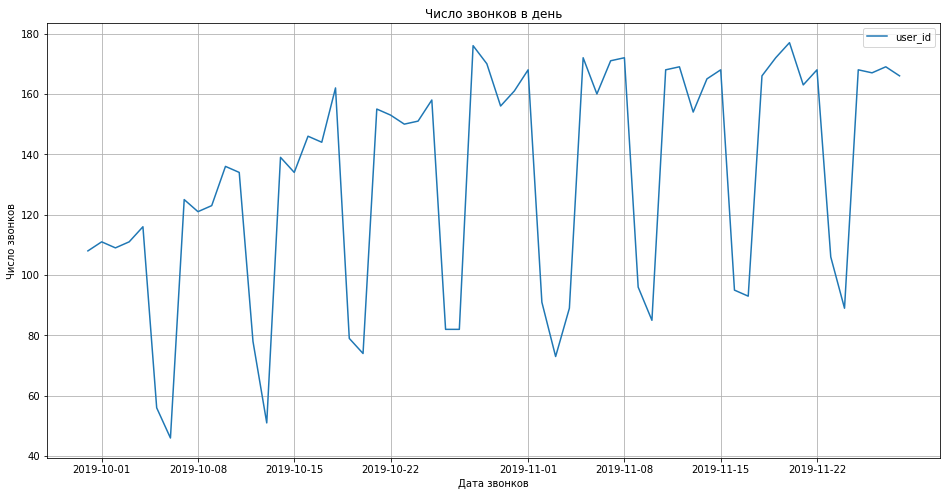

In [33]:
group_date.plot(y='user_id', x='date', grid=True, figsize=(16, 8));
plt.title('Число звонков в день')
plt.xlabel('Дата звонков')
plt.ylabel('Число звонков');

Данные по звонкам распределены равномерно. Четко выражен недельный цикл с большим числом звонков в будни и их снижении в выходные дни.

In [34]:
acx_df = df.pivot_table(index='user_id', values=['operator_id', 'calls_count'], aggfunc={'operator_id':'nunique', 'calls_count':'count'}).sort_values('calls_count', ascending=False).reset_index()
acx_df.head(30)

,user_id,calls_count,operator_id
0,168187,2330,50
1,167497,1274,30
2,168361,1149,27
3,166916,1101,16
4,166658,1080,17
5,168062,1071,27
6,167626,896,48
7,168252,795,28
8,167150,782,7
9,167445,694,11


Мы мидим прямую связь числа операторов от колл-центров и количество звонков операторам

Посмотрим на распределение числа операторов по колл-центрам

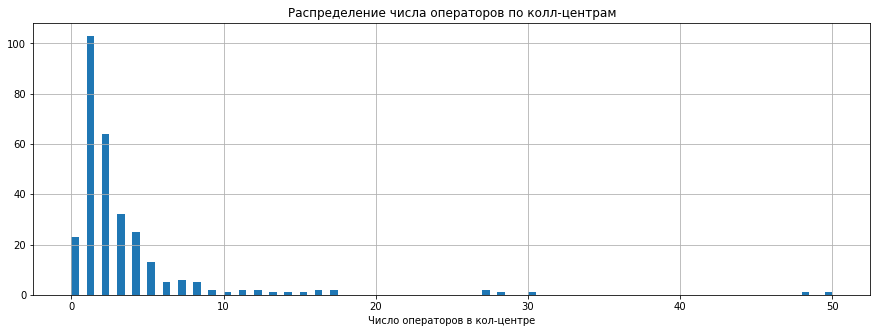

In [35]:
acx_df['operator_id'].hist(bins=100, figsize=(15, 5))
plt.title('Распределение числа операторов по колл-центрам')
plt.xlabel('Число операторов в кол-центре');

In [36]:
in_true = df.query('direction == "in" and internal == True')
in_true

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,day,week,missed_call,call_true
578,166392,2019-10-07,in,True,NaN,True,1,0,26,7,41,2,2
2141,166407,2019-10-01,in,True,NaN,True,1,0,23,1,40,2,2
2155,166407,2019-10-03,in,True,888534.0,True,1,0,23,3,40,2,2
2157,166407,2019-10-03,in,True,NaN,True,2,0,37,3,40,2,2
2211,166407,2019-10-12,in,True,NaN,True,1,0,22,12,41,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48331,168366,2019-11-01,in,True,952666.0,False,1,56,71,1,44,2,2
48743,168466,2019-11-14,in,True,NaN,True,1,0,0,14,46,2,2
48784,168481,2019-11-11,in,True,956276.0,False,1,27,34,11,46,2,2
48786,168481,2019-11-11,in,True,NaN,True,4,0,25,11,46,2,2


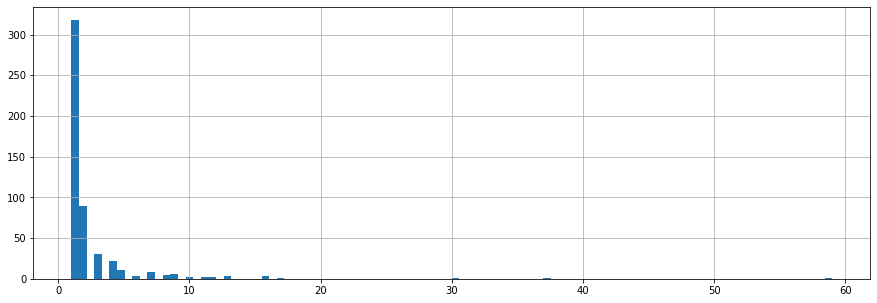

In [37]:
in_true['calls_count'].hist(bins=100, figsize=(15, 5));

In [38]:
in_false = df.query('direction == "in" and internal != True')
in_false

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,day,week,missed_call,call_true
265,166377,2019-10-02,in,False,880026.0,False,3,556,568,2,40,2,2
266,166377,2019-10-02,in,False,NaN,True,3,0,86,2,40,2,2
275,166377,2019-10-03,in,False,880028.0,False,2,133,140,3,40,2,2
277,166377,2019-10-03,in,False,NaN,True,2,0,60,3,40,2,2
285,166377,2019-10-07,in,False,NaN,True,2,0,71,7,41,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48990,168603,2019-11-28,in,False,NaN,True,1,0,30,28,48,2,2
48992,168606,2019-11-08,in,False,957922.0,True,1,0,7,8,45,2,2
48994,168606,2019-11-08,in,False,NaN,True,6,0,121,8,45,2,2
48995,168606,2019-11-08,in,False,957922.0,False,2,686,705,8,45,2,2


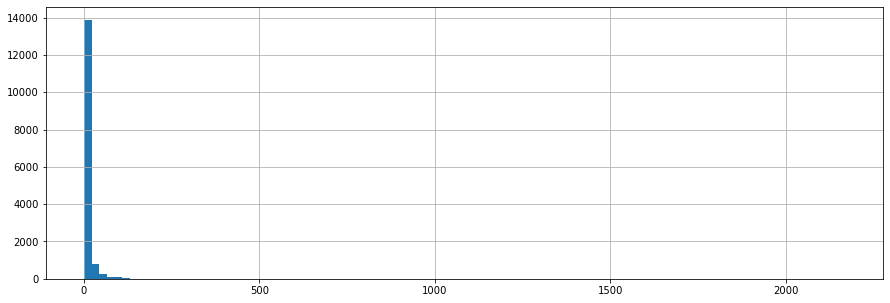

In [39]:
in_false['calls_count'].hist(bins=100, figsize=(15, 5)); 

Распределения идентичны, по столбцу internal соотношение False/True как 30/1. Будем рассматривать единые входящие звонки

In [40]:
direction_in = df.query('direction == "in"')
direction_in

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,day,week,missed_call,call_true
265,166377,2019-10-02,in,False,880026.0,False,3,556,568,2,40,2,2
266,166377,2019-10-02,in,False,NaN,True,3,0,86,2,40,2,2
275,166377,2019-10-03,in,False,880028.0,False,2,133,140,3,40,2,2
277,166377,2019-10-03,in,False,NaN,True,2,0,60,3,40,2,2
285,166377,2019-10-07,in,False,NaN,True,2,0,71,7,41,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48990,168603,2019-11-28,in,False,NaN,True,1,0,30,28,48,2,2
48992,168606,2019-11-08,in,False,957922.0,True,1,0,7,8,45,2,2
48994,168606,2019-11-08,in,False,NaN,True,6,0,121,8,45,2,2
48995,168606,2019-11-08,in,False,957922.0,False,2,686,705,8,45,2,2


In [41]:
direction_in['date'].min()

datetime.date(2019, 9, 30)

In [42]:
direction_in['date'].max()

datetime.date(2019, 11, 28)

In [43]:
direction_in_id = direction_in.pivot_table(index='user_id', values=['operator_id', 'calls_count'], aggfunc={'operator_id':'nunique', 'calls_count':'sum'}).sort_values('calls_count', ascending=False).reset_index()
direction_in_id.columns = ['user_id', 'calls_count_sum', 'operator_id_count']
direction_in_id

,user_id,calls_count_sum,operator_id_count
0,167626,24723,5
1,168361,17981,0
2,168252,13975,21
3,167071,8762,2
4,168187,7935,41
...,...,...,...
291,167455,1,0
292,166671,1,1
293,166481,1,0
294,168603,1,0


У нас имеются колл-центры с числом операторов 0. Это скорее всего кол-центры специализирующиеся на обзвонах клиентов и не принимающие звонки, поэтому такой звонок не направляется оператору и id не определяется

Определим колл-центры с 

In [44]:
id_call_0 = direction_in_id.query('operator_id_count == 0')
id_call_0

,user_id,calls_count_sum,operator_id_count
1,168361,17981,0
40,168018,684,0
64,167125,347,0
128,167285,92,0
143,168024,68,0
157,167631,58,0
184,167716,35,0
186,168128,34,0
190,166958,31,0
203,167077,26,0


In [45]:
df_in = direction_in.merge(id_call_0, left_on=['user_id'], right_on=['user_id'], how='left')
df_in

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,day,week,missed_call,call_true,calls_count_sum,operator_id_count
0,166377,2019-10-02,in,False,880026.0,False,3,556,568,2,40,2,2,NaN,NaN
1,166377,2019-10-02,in,False,NaN,True,3,0,86,2,40,2,2,NaN,NaN
2,166377,2019-10-03,in,False,880028.0,False,2,133,140,3,40,2,2,NaN,NaN
3,166377,2019-10-03,in,False,NaN,True,2,0,60,3,40,2,2,NaN,NaN
4,166377,2019-10-07,in,False,NaN,True,2,0,71,7,41,2,2,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15735,168603,2019-11-28,in,False,NaN,True,1,0,30,28,48,2,2,1.0,0.0
15736,168606,2019-11-08,in,False,957922.0,True,1,0,7,8,45,2,2,NaN,NaN
15737,168606,2019-11-08,in,False,NaN,True,6,0,121,8,45,2,2,NaN,NaN
15738,168606,2019-11-08,in,False,957922.0,False,2,686,705,8,45,2,2,NaN,NaN


In [46]:
df_in['operator_id_count'] = df_in['operator_id_count'].fillna(1)

In [47]:
df_in['operator_id_count'] = df_in['operator_id_count'].astype('int')
df_in

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,day,week,missed_call,call_true,calls_count_sum,operator_id_count
0,166377,2019-10-02,in,False,880026.0,False,3,556,568,2,40,2,2,NaN,1
1,166377,2019-10-02,in,False,NaN,True,3,0,86,2,40,2,2,NaN,1
2,166377,2019-10-03,in,False,880028.0,False,2,133,140,3,40,2,2,NaN,1
3,166377,2019-10-03,in,False,NaN,True,2,0,60,3,40,2,2,NaN,1
4,166377,2019-10-07,in,False,NaN,True,2,0,71,7,41,2,2,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15735,168603,2019-11-28,in,False,NaN,True,1,0,30,28,48,2,2,1.0,0
15736,168606,2019-11-08,in,False,957922.0,True,1,0,7,8,45,2,2,NaN,1
15737,168606,2019-11-08,in,False,NaN,True,6,0,121,8,45,2,2,NaN,1
15738,168606,2019-11-08,in,False,957922.0,False,2,686,705,8,45,2,2,NaN,1


In [48]:
df_in['operator_id_count'].fillna(1).astype('int')

0        1
1        1
2        1
3        1
4        1
        ..
15735    0
15736    1
15737    1
15738    1
15739    1
Name: operator_id_count, Length: 15740, dtype: int32

In [49]:
data_in_no_0 = df_in.query('operator_id_count == 1')

In [50]:
data_in_1 = data_in_no_0.loc[:, ['user_id', 'date', 'operator_id', 'is_missed_call', 'calls_count', 'call_duration', 'total_call_duration']]

In [51]:
#df_vhod_False = data_in_false_1.query('is_missed_call == False')
df_in_group = data_in_1.groupby(['user_id', 'date', 'is_missed_call']).agg({'calls_count': ['sum'], 'call_duration': ['sum'], 'total_call_duration': ['sum'], 'operator_id': ['nunique']}).reset_index()
df_in_group.columns = ['user_id', 'date', 'is_missed_call', 'calls_count_sum', 'call_duration_sum', 'total_call_duration_sum', 'operator_id_count']
df_in_group

,user_id,date,is_missed_call,calls_count_sum,call_duration_sum,total_call_duration_sum,operator_id_count
0,166377,2019-10-02,False,3,556,568,1
1,166377,2019-10-02,True,3,0,86,0
2,166377,2019-10-03,False,2,133,140,1
3,166377,2019-10-03,True,2,0,60,0
4,166377,2019-10-07,False,1,19,31,1
...,...,...,...,...,...,...,...
10270,168601,2019-11-27,True,2,0,39,0
10271,168601,2019-11-28,True,1,0,19,0
10272,168606,2019-11-08,False,2,686,705,1
10273,168606,2019-11-08,True,7,0,128,1


Отделим пропущенные и принятые звонки

In [52]:
df_in_group_no_miss = df_in_group.query('is_missed_call == False')
df_in_group_no_miss

,user_id,date,is_missed_call,calls_count_sum,call_duration_sum,total_call_duration_sum,operator_id_count
0,166377,2019-10-02,False,3,556,568,1
2,166377,2019-10-03,False,2,133,140,1
4,166377,2019-10-07,False,1,19,31,1
6,166377,2019-10-08,False,1,18,25,1
10,166377,2019-10-11,False,4,320,336,2
...,...,...,...,...,...,...,...
10263,168601,2019-11-22,False,2,429,442,1
10265,168601,2019-11-25,False,7,1229,1282,1
10267,168601,2019-11-26,False,4,539,562,1
10269,168601,2019-11-27,False,2,53,77,1


Посчитаем показатели принятых звонков на одного порератора

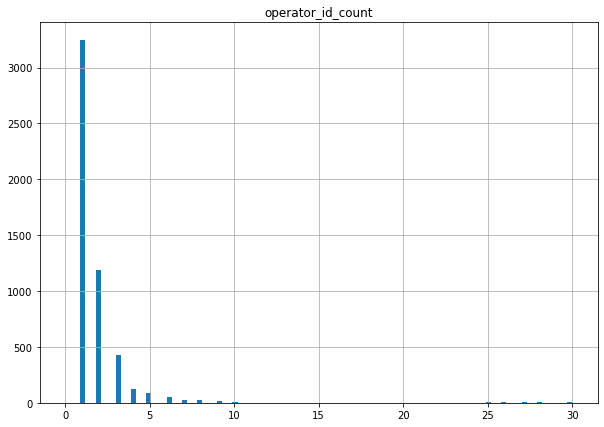

In [53]:
df_in_group_no_miss.hist('operator_id_count', bins=100, figsize=(10, 7));

Большая часть операторов относится к одному колл-центру, так же модно выделить 2-х и 3-х операторов от одного колл-центра. При большем числе операторов доля колл-центров невелика

Не определился один оператор, удалим данную строку

In [54]:
in_group_no_miss = df_in_group_no_miss.query('operator_id_count != 0')

Определим длительность звонка на одного оператора

In [55]:
in_group_no_miss['dlit_zvonka'] =  in_group_no_miss['call_duration_sum'] / (in_group_no_miss['calls_count_sum'] * in_group_no_miss['operator_id_count'])

Определим число звонков на одного оператора

In [56]:
in_group_no_miss['chislo_zvonkov_oper'] =  in_group_no_miss['calls_count_sum'] / in_group_no_miss['operator_id_count']

Посмотрим есть ли выбросы в данных и как они влияют на результат

In [57]:
in_group_no_miss.describe()

,user_id,calls_count_sum,call_duration_sum,total_call_duration_sum,operator_id_count,dlit_zvonka,chislo_zvonkov_oper
count,5244.000000,5244.000000,5244.000000,5244.000000,5244.000000,5244.000000,5244.000000
mean,167313.527269,15.649695,1620.058162,1824.115751,1.833905,81.530232,7.917451
std,557.317817,35.085801,3744.101965,4015.812299,2.268642,102.295437,16.174955
min,166377.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000
25%,166879.000000,2.000000,110.000000,141.000000,1.000000,29.000000,1.000000
50%,167235.000000,4.000000,437.000000,504.000000,1.000000,54.000000,3.000000
75%,167781.000000,14.000000,1480.000000,1693.250000,2.000000,97.033333,7.500000
max,168606.000000,592.000000,57326.000000,59071.000000,30.000000,2325.000000,273.000000


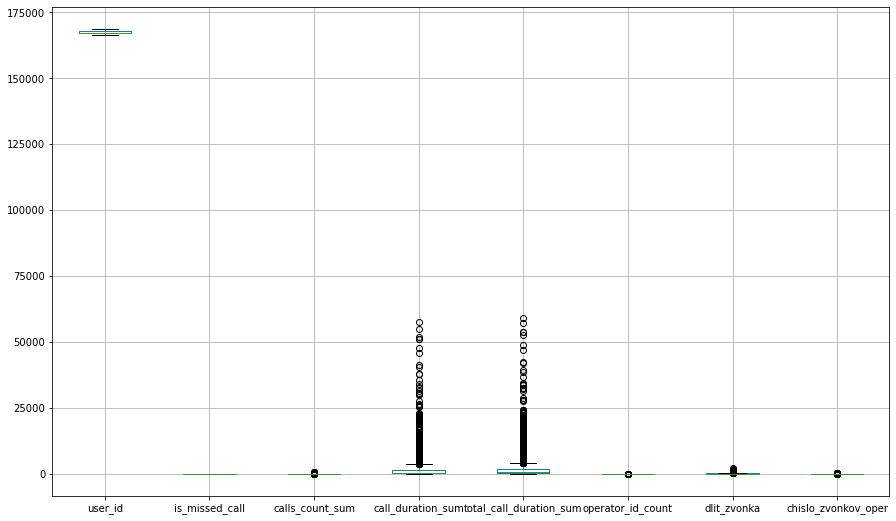

In [58]:
in_group_no_miss.boxplot(figsize=(15, 9));

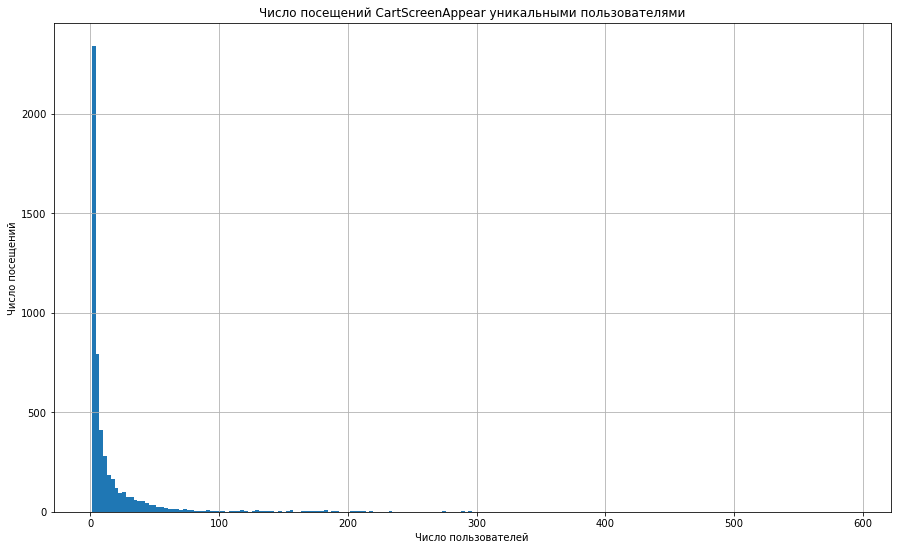

In [59]:
in_group_no_miss.hist('calls_count_sum', bins=200, figsize=(15, 9))
plt.title('Число посещений CartScreenAppear уникальными пользователями')
plt.ylabel('Число посещений')
plt.xlabel('Число пользователей');

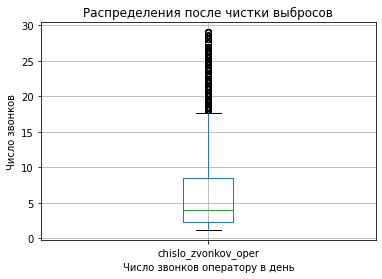

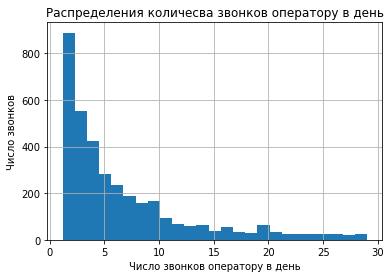

In [60]:
p5 = np.percentile(in_group_no_miss['chislo_zvonkov_oper'], [5])
p5
p95 = np.percentile(in_group_no_miss['chislo_zvonkov_oper'], [95])
p95
# in_group_no_miss_new = in_group_no_miss.query('@p5 < chislo_zvonkov_oper <= @p95')

in_group_no_miss_new = in_group_no_miss.loc[
    (in_group_no_miss["chislo_zvonkov_oper"] > p5[0]) &
    (in_group_no_miss["chislo_zvonkov_oper"] <= p95[0])
]

plt.title('Распределения после чистки выбросов')
in_group_no_miss_new.boxplot('chislo_zvonkov_oper')
plt.xlabel('Число звонков оператору в день')
plt.ylabel('Число звонков');
plt.show()
in_group_no_miss_new['chislo_zvonkov_oper'].hist(bins=25)
plt.title('Распределения количесва звонков оператору в день')
plt.xlabel('Число звонков оператору в день')
plt.ylabel('Число звонков')
plt.show()

In [61]:
in_group_no_miss_new.describe()

,user_id,calls_count_sum,call_duration_sum,total_call_duration_sum,operator_id_count,dlit_zvonka,chislo_zvonkov_oper
count,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000
mean,167285.500554,14.353740,1567.650416,1788.597507,2.099723,75.851741,6.767043
std,557.771229,21.526307,2462.613729,2735.948707,2.634790,74.518454,6.126156
min,166377.000000,2.000000,2.000000,10.000000,1.000000,1.000000,1.166667
25%,166836.000000,3.000000,269.000000,323.000000,1.000000,31.500000,2.333333
50%,167185.000000,7.000000,716.000000,814.000000,1.000000,55.500000,4.000000
75%,167747.000000,17.000000,1821.000000,2050.000000,2.000000,94.187500,8.500000
max,168606.000000,247.000000,31258.000000,33658.000000,30.000000,1062.000000,29.000000


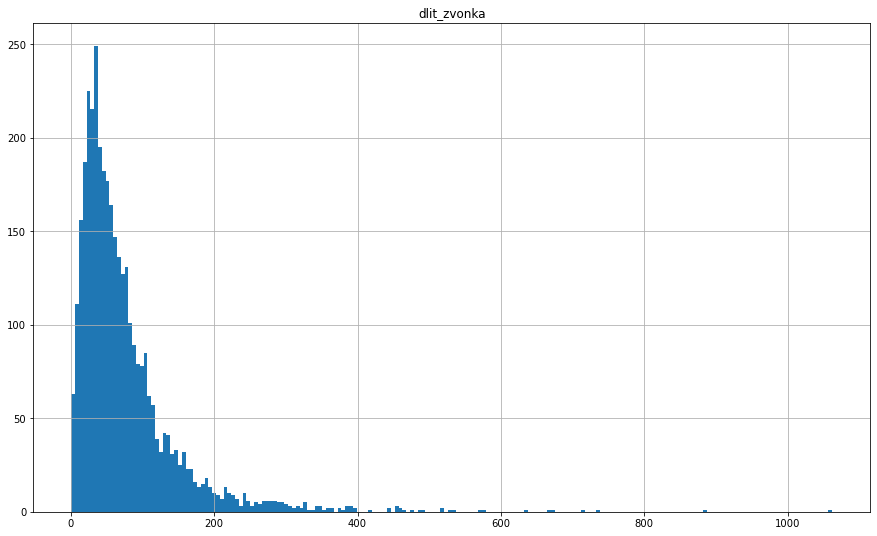

In [62]:
in_group_no_miss_new.hist('dlit_zvonka', bins=200, figsize=(15, 9));

Убрав выбросы, мы видим, что медианное время звонка, которое тратит оператор на клиента составляет 55 минут. Отличным показателем будет, если оператор тратит около 30 минут и плохим - если на разговор уходит 90 минут. Медианное значение принятых звонков опероторов в день составляет 4. Хорошим показателем будет, если оператор принимает более 8 звонков и плохой показатель если 2 и менее. 

In [63]:
in_group_no_miss_new

,user_id,date,is_missed_call,calls_count_sum,call_duration_sum,total_call_duration_sum,operator_id_count,dlit_zvonka,chislo_zvonkov_oper
0,166377,2019-10-02,False,3,556,568,1,185.333333,3.0
2,166377,2019-10-03,False,2,133,140,1,66.500000,2.0
10,166377,2019-10-11,False,4,320,336,2,40.000000,2.0
18,166377,2019-10-22,False,3,93,101,1,31.000000,3.0
25,166377,2019-10-30,False,4,166,180,1,41.500000,4.0
...,...,...,...,...,...,...,...,...,...
10263,168601,2019-11-22,False,2,429,442,1,214.500000,2.0
10265,168601,2019-11-25,False,7,1229,1282,1,175.571429,7.0
10267,168601,2019-11-26,False,4,539,562,1,134.750000,4.0
10269,168601,2019-11-27,False,2,53,77,1,26.500000,2.0


**Рассмотрим входящие пропущенные звонки**

In [64]:
df_in_group_miss = df_in_group.query('is_missed_call != False')
df_in_group_miss

,user_id,date,is_missed_call,calls_count_sum,call_duration_sum,total_call_duration_sum,operator_id_count
1,166377,2019-10-02,True,3,0,86,0
3,166377,2019-10-03,True,2,0,60,0
5,166377,2019-10-07,True,2,0,71,0
7,166377,2019-10-08,True,1,0,6,0
8,166377,2019-10-09,True,4,0,22,0
...,...,...,...,...,...,...,...
10268,168601,2019-11-26,True,3,0,35,0
10270,168601,2019-11-27,True,2,0,39,0
10271,168601,2019-11-28,True,1,0,19,0
10273,168606,2019-11-08,True,7,0,128,1


In [65]:
in_false_true = df_in_group_miss.merge(in_group_no_miss, left_on=['user_id', 'date'], right_on=['user_id', 'date'], how='left')
in_false_true

,user_id,date,is_missed_call_x,calls_count_sum_x,call_duration_sum_x,total_call_duration_sum_x,operator_id_count_x,is_missed_call_y,calls_count_sum_y,call_duration_sum_y,total_call_duration_sum_y,operator_id_count_y,dlit_zvonka,chislo_zvonkov_oper
0,166377,2019-10-02,True,3,0,86,0,False,3.0,556.0,568.0,1.0,185.333333,3.0
1,166377,2019-10-03,True,2,0,60,0,False,2.0,133.0,140.0,1.0,66.500000,2.0
2,166377,2019-10-07,True,2,0,71,0,False,1.0,19.0,31.0,1.0,19.000000,1.0
3,166377,2019-10-08,True,1,0,6,0,False,1.0,18.0,25.0,1.0,18.000000,1.0
4,166377,2019-10-09,True,4,0,22,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5024,168601,2019-11-26,True,3,0,35,0,False,4.0,539.0,562.0,1.0,134.750000,4.0
5025,168601,2019-11-27,True,2,0,39,0,False,2.0,53.0,77.0,1.0,26.500000,2.0
5026,168601,2019-11-28,True,1,0,19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5027,168606,2019-11-08,True,7,0,128,1,False,2.0,686.0,705.0,1.0,343.000000,2.0


При совмещении 2-х датасетов, мы видим пропуски. Причем есть пропущенные звонки, но в столбце is_missed_call_y значение NaN - операторы не работали в это время, поэтому далим эти значения.

In [66]:
in_false_true['is_missed_call_y'] = in_false_true['is_missed_call_y'].fillna(True)
in_false_true_missed_nan = in_false_true.query('is_missed_call_y != True')
in_false_true_missed_nan.head(5)

,user_id,date,is_missed_call_x,calls_count_sum_x,call_duration_sum_x,total_call_duration_sum_x,operator_id_count_x,is_missed_call_y,calls_count_sum_y,call_duration_sum_y,total_call_duration_sum_y,operator_id_count_y,dlit_zvonka,chislo_zvonkov_oper
0,166377,2019-10-02,True,3,0,86,0,False,3.0,556.0,568.0,1.0,185.333333,3.0
1,166377,2019-10-03,True,2,0,60,0,False,2.0,133.0,140.0,1.0,66.500000,2.0
2,166377,2019-10-07,True,2,0,71,0,False,1.0,19.0,31.0,1.0,19.000000,1.0
3,166377,2019-10-08,True,1,0,6,0,False,1.0,18.0,25.0,1.0,18.000000,1.0
6,166377,2019-10-15,True,1,0,1,0,False,1.0,13.0,31.0,1.0,13.000000,1.0


In [67]:
in_missed_nan = in_false_true_missed_nan.loc[:, ['user_id', 'date', 'calls_count_sum_x', 'total_call_duration_sum_x', 'calls_count_sum_y', 'operator_id_count_y', 'dlit_zvonka', 'chislo_zvonkov_oper']]

Определим отношение принятых вызовов к пропущенным для одного оператора

In [68]:
in_missed_nan['call_miss'] = in_missed_nan['calls_count_sum_y'] / (in_missed_nan['calls_count_sum_x'] * in_missed_nan['operator_id_count_y'])

In [69]:
in_missed_nan

,user_id,date,calls_count_sum_x,total_call_duration_sum_x,calls_count_sum_y,operator_id_count_y,dlit_zvonka,chislo_zvonkov_oper,call_miss
0,166377,2019-10-02,3,86,3.0,1.0,185.333333,3.0,1.000000
1,166377,2019-10-03,2,60,2.0,1.0,66.500000,2.0,1.000000
2,166377,2019-10-07,2,71,1.0,1.0,19.000000,1.0,0.500000
3,166377,2019-10-08,1,6,1.0,1.0,18.000000,1.0,1.000000
6,166377,2019-10-15,1,1,1.0,1.0,13.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...,...
5019,168601,2019-11-15,2,71,10.0,1.0,95.500000,10.0,5.000000
5023,168601,2019-11-25,1,28,7.0,1.0,175.571429,7.0,7.000000
5024,168601,2019-11-26,3,35,4.0,1.0,134.750000,4.0,1.333333
5025,168601,2019-11-27,2,39,2.0,1.0,26.500000,2.0,1.000000


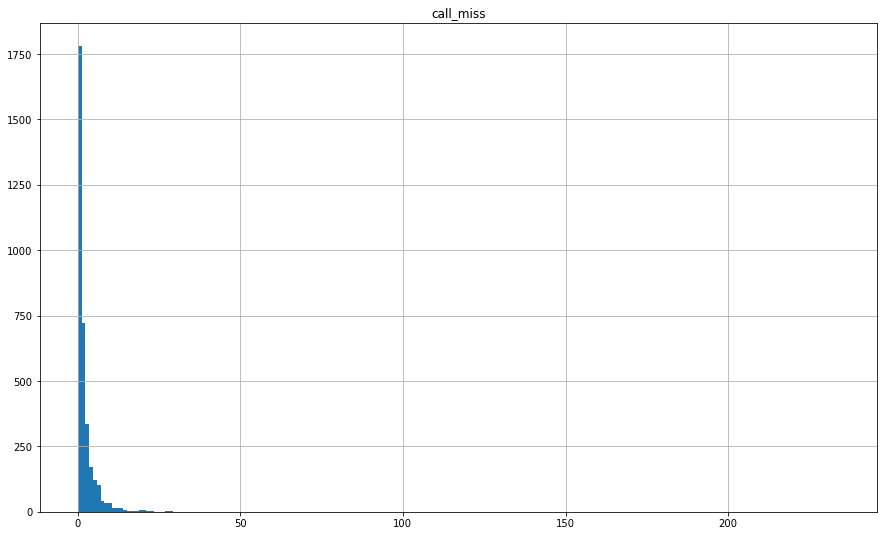

In [70]:
in_missed_nan.hist('call_miss', bins=200, figsize=(15, 9));

Посмотрим на выбросы

In [71]:
in_missed_nan['call_miss'].describe()

count    3438.000000
mean        2.686428
std         9.102193
min         0.002230
25%         0.500000
50%         1.077935
75%         2.550000
max       234.000000
Name: call_miss, dtype: float64

In [72]:
p5_missed = np.percentile(in_missed_nan['call_miss'], [5])[0]
p5_missed

0.13590909090909098

In [73]:
p95_missed = np.percentile(in_missed_nan['call_miss'], [95])[0]
p95_missed

8.0

In [74]:
in_missed_nan

,user_id,date,calls_count_sum_x,total_call_duration_sum_x,calls_count_sum_y,operator_id_count_y,dlit_zvonka,chislo_zvonkov_oper,call_miss
0,166377,2019-10-02,3,86,3.0,1.0,185.333333,3.0,1.000000
1,166377,2019-10-03,2,60,2.0,1.0,66.500000,2.0,1.000000
2,166377,2019-10-07,2,71,1.0,1.0,19.000000,1.0,0.500000
3,166377,2019-10-08,1,6,1.0,1.0,18.000000,1.0,1.000000
6,166377,2019-10-15,1,1,1.0,1.0,13.000000,1.0,1.000000
...,...,...,...,...,...,...,...,...,...
5019,168601,2019-11-15,2,71,10.0,1.0,95.500000,10.0,5.000000
5023,168601,2019-11-25,1,28,7.0,1.0,175.571429,7.0,7.000000
5024,168601,2019-11-26,3,35,4.0,1.0,134.750000,4.0,1.333333
5025,168601,2019-11-27,2,39,2.0,1.0,26.500000,2.0,1.000000


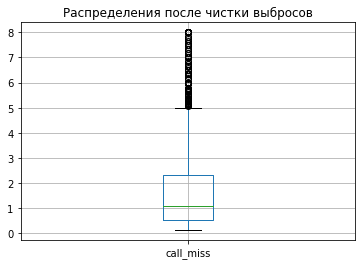

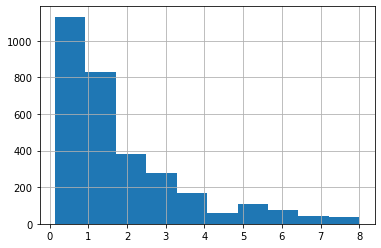

In [75]:
in_group_no_miss_new = in_missed_nan.query('@p5_missed < call_miss <= @p95_missed')
plt.title('Распределения после чистки выбросов')
in_group_no_miss_new.boxplot('call_miss')
plt.show()
in_group_no_miss_new['call_miss'].hist(bins=10)
plt.show();

In [76]:
in_group_no_miss_new['call_miss'].describe()

count    3101.000000
mean        1.782497
std         1.682882
min         0.136364
25%         0.545455
50%         1.083333
75%         2.333333
max         8.000000
Name: call_miss, dtype: float64

Медианное значение отношения принятых звонков к пропущенным составляет 1. Хороший показатель если это отношение больше 2-х и плохой показатель, если число пропущенных звонков в 2 раза больше принятых.

# Исходящие

In [77]:
out = df.query('direction == "out"')
out

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,day,week,missed_call,call_true
258,166377,2019-09-30,out,False,880020.0,False,4,724,749,30,40,2,2
259,166377,2019-09-30,out,False,880022.0,False,1,144,146,30,40,2,2
260,166377,2019-09-30,out,False,880020.0,True,4,0,12,30,40,2,2
261,166377,2019-10-01,out,False,880026.0,False,19,2023,2155,1,40,2,2
262,166377,2019-10-01,out,False,880020.0,False,1,106,108,1,40,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48993,168606,2019-11-08,out,False,957922.0,False,2,255,328,8,45,2,2
48996,168606,2019-11-09,out,False,957922.0,False,4,551,593,9,45,2,2
48998,168606,2019-11-10,out,True,957922.0,True,1,0,38,10,45,2,2
48999,168606,2019-11-11,out,True,957922.0,False,2,479,501,11,46,2,2


In [78]:
out_loc = out.loc[:, ['user_id', 'date', 'is_missed_call', 'operator_id', 
                      'calls_count', 'call_duration', 'total_call_duration']]

In [79]:
#out.loc[:, ['user_id', 'date', 'is_missed_call', 'operator_id', 'calls_count', 'call_duration', 'total_call_duration']]out_loc['calls_count'].hist(bins=100, figsize=(15, 5));

У нас достаточно большой разброс по числу звонков.
Разобьем на 2 датасета с исходящими и дозвонившимися и исходящими и не дозвонившимися

**Исходящие и не дозвонившиеся**

In [80]:
out_false = out_loc.query('is_missed_call == False')
out_false

,user_id,date,is_missed_call,operator_id,calls_count,call_duration,total_call_duration
258,166377,2019-09-30,False,880020.0,4,724,749
259,166377,2019-09-30,False,880022.0,1,144,146
261,166377,2019-10-01,False,880026.0,19,2023,2155
262,166377,2019-10-01,False,880020.0,1,106,108
268,166377,2019-10-02,False,880028.0,19,1768,1957
...,...,...,...,...,...,...,...
48989,168603,2019-11-27,False,959118.0,1,76,99
48993,168606,2019-11-08,False,957922.0,2,255,328
48996,168606,2019-11-09,False,957922.0,4,551,593
48999,168606,2019-11-11,False,957922.0,2,479,501


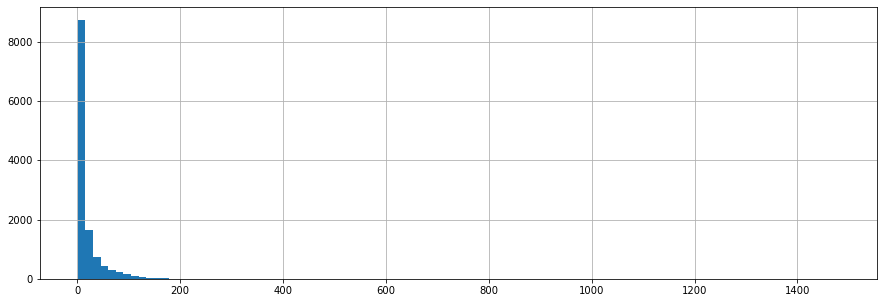

In [81]:
out_false['calls_count'].hist(bins=100, figsize=(15, 5));

In [82]:
out_false_id = out_false.pivot_table(index='user_id', values=['call_duration', 'total_call_duration'], aggfunc={'call_duration':'sum', 'total_call_duration':'sum'}).sort_values('call_duration', ascending=False).reset_index()
#direction_in_id.columns = ['user_id', 'calls_count_sum', 'operator_id_count']
out_false_id

,user_id,call_duration,total_call_duration
0,168361,4240574,5015165
1,166582,3498291,4128189
2,167626,2224409,2691486
3,166658,1090781,1144842
4,167827,675078,859165
...,...,...,...
187,166874,8,20
188,167397,7,14
189,168500,6,30
190,167840,5,8


Большая разница в числе исходящих звонков от различных колл-центров

Определим число операторов работающих на обзвонах

In [83]:
out_false_id = out_false.groupby(['user_id', 'date']).agg({'calls_count': ['sum'], 'call_duration': ['sum'], 'total_call_duration': ['sum'], 'operator_id': ['nunique']}).reset_index()
out_false_id.columns = ['user_id', 'date', 'calls_count_sum', 'call_duration_sum', 'total_call_duration_sum', 'operator_id_count']
out_false_id

,user_id,date,calls_count_sum,call_duration_sum,total_call_duration_sum,operator_id_count
0,166377,2019-09-30,5,868,895,2
1,166377,2019-10-01,20,2129,2263,2
2,166377,2019-10-02,39,3530,3837,2
3,166377,2019-10-03,40,2916,3218,4
4,166377,2019-10-04,44,4992,5434,3
...,...,...,...,...,...,...
4546,168603,2019-11-27,1,76,99,1
4547,168606,2019-11-08,2,255,328,1
4548,168606,2019-11-09,4,551,593,1
4549,168606,2019-11-11,2,479,501,1


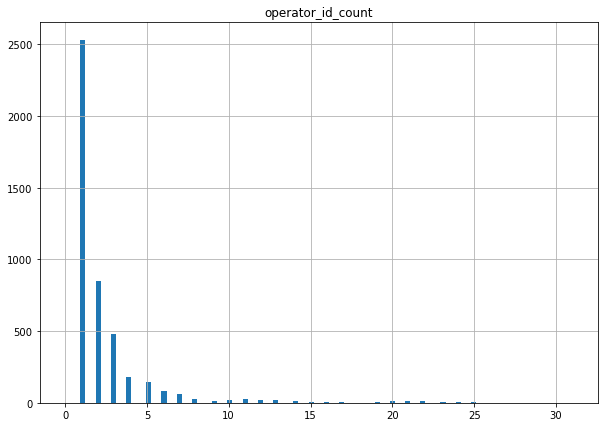

In [84]:
out_false_id.hist('operator_id_count', bins=100, figsize=(10, 7));

Наибольшее число колл-центров с одним оператором, большую\долю так же составляют колл-центры с 2 и 3-мя операторами. Доля колл-центров остальных не сучественна.

Определим длительность звонка на одного оператора

In [85]:
df_out_false = out_false_id.query('operator_id_count != 0')
df_out_false

,user_id,date,calls_count_sum,call_duration_sum,total_call_duration_sum,operator_id_count
0,166377,2019-09-30,5,868,895,2
1,166377,2019-10-01,20,2129,2263,2
2,166377,2019-10-02,39,3530,3837,2
3,166377,2019-10-03,40,2916,3218,4
4,166377,2019-10-04,44,4992,5434,3
...,...,...,...,...,...,...
4546,168603,2019-11-27,1,76,99,1
4547,168606,2019-11-08,2,255,328,1
4548,168606,2019-11-09,4,551,593,1
4549,168606,2019-11-11,2,479,501,1


Убрали 2 строки с ошибочными данными

In [86]:
df_out_false['dlit_zvonka'] = df_out_false['call_duration_sum'] / (df_out_false['calls_count_sum'] * df_out_false['operator_id_count'])

Определим число звонков на одного оператора

In [87]:
df_out_false['chislo_zvonkov_oper'] =  df_out_false['calls_count_sum'] / df_out_false['operator_id_count']

Посмотрим есть ли выбросы в данных и как они влияют на результат

In [88]:
df_out_false.describe()

,user_id,calls_count_sum,call_duration_sum,total_call_duration_sum,operator_id_count,dlit_zvonka,chislo_zvonkov_oper
count,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000
mean,167298.042207,55.076061,5088.971202,5973.198725,2.469774,78.287800,18.143289
std,553.662230,180.558644,17564.985446,20781.522488,3.266629,119.850487,48.598225
min,166377.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000
25%,166839.000000,4.000000,332.000000,411.000000,1.000000,23.301802,3.000000
50%,167188.000000,13.000000,1089.000000,1295.000000,1.000000,44.523810,8.000000
75%,167727.000000,36.000000,3156.000000,3671.000000,3.000000,84.884615,19.000000
max,168606.000000,2275.000000,217013.000000,248524.000000,31.000000,1967.000000,1051.000000


array([[<AxesSubplot:title={'center':'calls_count_sum'}>]], dtype=object)

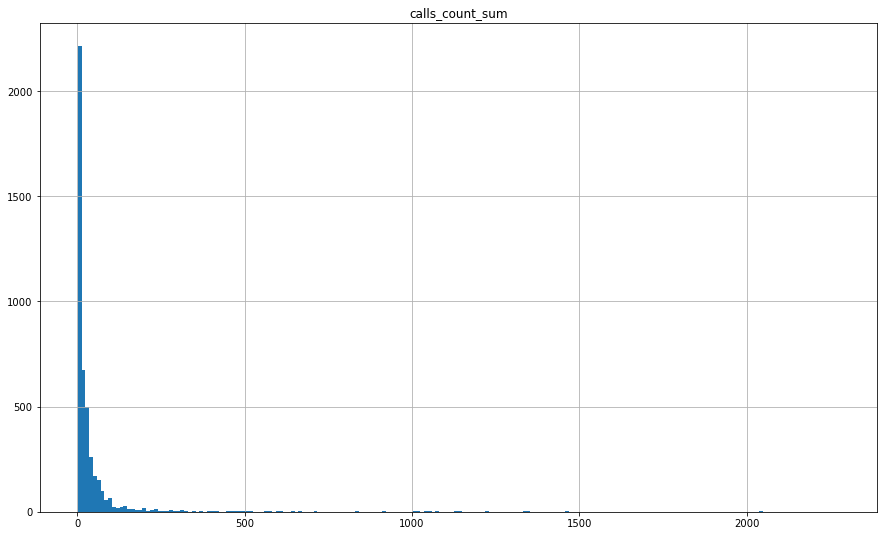

In [89]:
df_out_false.hist('calls_count_sum', bins=200, figsize=(15, 9))

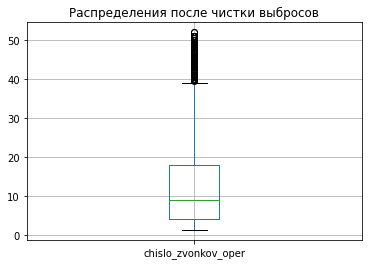

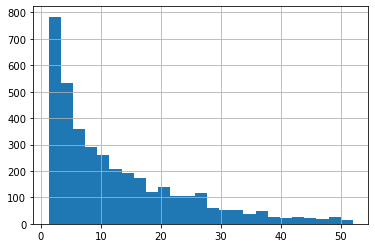

In [90]:
p95_out_false = np.percentile(df_out_false['chislo_zvonkov_oper'], [95])[0]
p95_out_false
p5_out_false = np.percentile(df_out_false['chislo_zvonkov_oper'], [5])[0]
p5_out_false

new_out_false = df_out_false.query('@p5_out_false < chislo_zvonkov_oper <= @p95_out_false')
plt.title('Распределения после чистки выбросов')
new_out_false.boxplot('chislo_zvonkov_oper')
plt.show()
new_out_false['chislo_zvonkov_oper'].hist(bins=25)
plt.show()

In [91]:
new_out_false.describe()

,user_id,calls_count_sum,call_duration_sum,total_call_duration_sum,operator_id_count,dlit_zvonka,chislo_zvonkov_oper
count,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000,3791.000000
mean,167281.882089,31.891849,3088.816935,3539.363756,2.474809,73.976636,12.580657
std,544.338167,59.443580,5805.925476,6637.329078,3.006297,98.253309,10.974319
min,166377.000000,2.000000,6.000000,20.000000,1.000000,2.226320,1.250000
25%,166833.000000,6.000000,495.000000,593.500000,1.000000,24.116667,4.000000
50%,167183.000000,15.000000,1231.000000,1463.000000,1.000000,45.263158,9.000000
75%,167716.000000,35.000000,3125.500000,3591.500000,3.000000,83.650000,18.000000
max,168606.000000,1338.000000,109213.000000,133228.000000,31.000000,1177.000000,52.000000


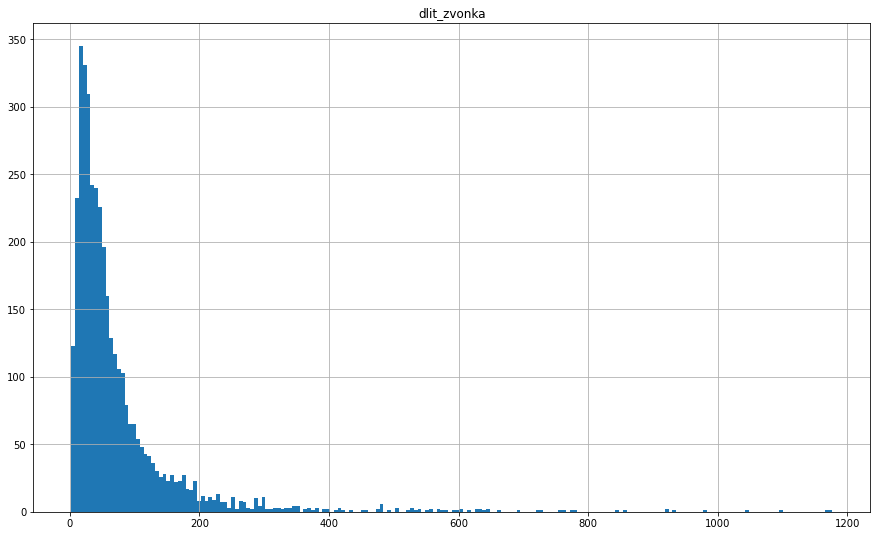

In [92]:
new_out_false.hist('dlit_zvonka', bins=200, figsize=(15, 9));

Убрав выбросы, мы видим, что медианное время звонка, которое тратит оператор на клиента составляет 45 минут. Отличным показателем будет, если оператор тратит около 25 минут и плохим - если на разговор уходит 80 минут. Медианное значение исходящих звонков оперотора в день составляет 9. Хорошим показателем будет, если оператор принимает более 18 звонков и плохой показатель если 4 и менее. 

**Рассмотрим исходящие звонки от оператора, когда оббонент не принял звонок**

In [93]:
out_true = out_loc.query('is_missed_call == True')
out_true

,user_id,date,is_missed_call,operator_id,calls_count,call_duration,total_call_duration
260,166377,2019-09-30,True,880020.0,4,0,12
263,166377,2019-10-01,True,880026.0,3,0,102
264,166377,2019-10-02,True,880026.0,3,0,69
267,166377,2019-10-02,True,880028.0,10,0,313
272,166377,2019-10-03,True,880026.0,2,0,0
...,...,...,...,...,...,...,...
48983,168601,2019-11-28,True,952914.0,2,0,67
48985,168603,2019-11-20,True,959118.0,3,0,89
48987,168603,2019-11-21,True,959118.0,1,0,10
48991,168606,2019-11-08,True,957922.0,2,0,40


In [94]:
out_true_id = out_true.groupby(['user_id', 'date']).agg({'calls_count': ['sum'], 'call_duration': ['sum'], 'total_call_duration': ['sum'], 'operator_id': ['nunique']}).reset_index()
out_true_id.columns = ['user_id', 'date', 'calls_count_sum', 'call_duration_sum', 'total_call_duration_sum', 'operator_id_count']
out_true_id

,user_id,date,calls_count_sum,call_duration_sum,total_call_duration_sum,operator_id_count
0,166377,2019-09-30,4,0,12,1
1,166377,2019-10-01,3,0,102,1
2,166377,2019-10-02,13,0,382,2
3,166377,2019-10-03,27,0,703,2
4,166377,2019-10-04,20,0,447,2
...,...,...,...,...,...,...
4139,168601,2019-11-28,2,0,67,1
4140,168603,2019-11-20,3,0,89,1
4141,168603,2019-11-21,1,0,10,1
4142,168606,2019-11-08,2,0,40,1


Уберем 6 строк с чилом операторов = 0

In [95]:
out_true_id_new = out_true_id.query('operator_id_count != 0')

In [96]:
out_true_id_new['chislo_zvonkov_oper'] = out_true_id_new['calls_count_sum'] / out_true_id_new['operator_id_count']

In [97]:
out_true_id_new['dlit_zvonka'] = out_true_id_new['total_call_duration_sum'] / (out_true_id_new['calls_count_sum'] * out_true_id_new['operator_id_count'])

In [98]:
out_true_id_new

,user_id,date,calls_count_sum,call_duration_sum,total_call_duration_sum,operator_id_count,chislo_zvonkov_oper,dlit_zvonka
0,166377,2019-09-30,4,0,12,1,4.0,3.000000
1,166377,2019-10-01,3,0,102,1,3.0,34.000000
2,166377,2019-10-02,13,0,382,2,6.5,14.692308
3,166377,2019-10-03,27,0,703,2,13.5,13.018519
4,166377,2019-10-04,20,0,447,2,10.0,11.175000
...,...,...,...,...,...,...,...,...
4139,168601,2019-11-28,2,0,67,1,2.0,33.500000
4140,168603,2019-11-20,3,0,89,1,3.0,29.666667
4141,168603,2019-11-21,1,0,10,1,1.0,10.000000
4142,168606,2019-11-08,2,0,40,1,2.0,20.000000


In [99]:
out_true_id_new.describe()

,user_id,calls_count_sum,call_duration_sum,total_call_duration_sum,operator_id_count,chislo_zvonkov_oper,dlit_zvonka
count,4138.000000,4138.000000,4138.0,4138.000000,4138.000000,4138.000000,4138.000000
mean,167311.826245,50.824553,0.0,1106.953117,2.310778,16.932748,15.894087
std,565.920954,191.635567,0.0,4124.707485,3.165805,67.361743,12.786420
min,166377.000000,1.000000,0.0,0.000000,1.000000,1.000000,0.000000
25%,166839.000000,3.000000,0.0,52.000000,1.000000,2.000000,6.000000
50%,167188.000000,8.000000,0.0,172.000000,1.000000,5.000000,12.288690
75%,167756.000000,23.000000,0.0,494.500000,2.000000,12.791667,23.500000
max,168606.000000,4845.000000,0.0,57387.000000,31.000000,2422.500000,130.500000


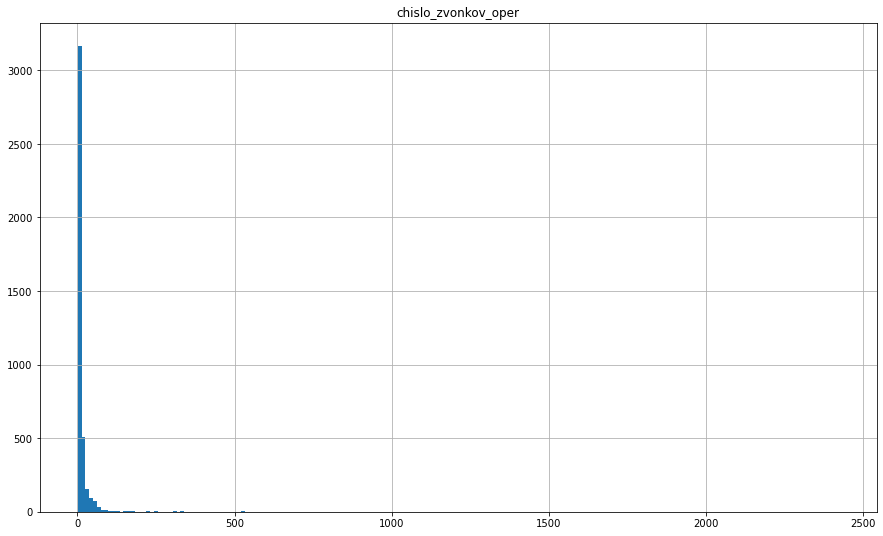

In [100]:
out_true_id_new.hist('chislo_zvonkov_oper', bins=200, figsize=(15, 9));

In [101]:
p5_out_true = np.percentile(out_true_id_new['chislo_zvonkov_oper'], [5])[0]
p5_out_true

1.0

In [102]:
p95_out_true = np.percentile(out_true_id_new['chislo_zvonkov_oper'], [95])[0]
p95_out_true

50.551923076922954

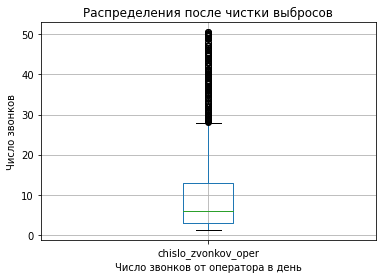

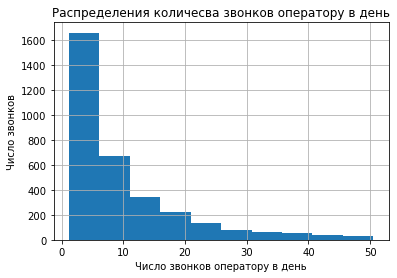

In [103]:
out_true_id_new_df = out_true_id_new.query('@p5_out_true < chislo_zvonkov_oper <= @p95_out_true')
plt.title('Распределения после чистки выбросов')
out_true_id_new_df.boxplot('chislo_zvonkov_oper')

plt.xlabel('Число звонков от оператора в день')
plt.ylabel('Число звонков')
plt.show()
out_true_id_new_df['chislo_zvonkov_oper'].hist(bins=10)
plt.title('Распределения количесва звонков оператору в день')
plt.xlabel('Число звонков оператору в день')
plt.ylabel('Число звонков')
plt.show()

In [104]:
import seaborn as sns
from matplotlib import pyplot as plt

In [105]:
out_true_id_new_df.describe()

,user_id,calls_count_sum,call_duration_sum,total_call_duration_sum,operator_id_count,chislo_zvonkov_oper,dlit_zvonka
count,3283.000000,3283.000000,3283.0,3283.000000,3283.000000,3283.000000,3283.000000
mean,167307.187938,28.918367,0.0,635.211087,2.369479,9.801608,15.550983
std,567.656255,85.017789,0.0,1927.923187,3.017258,9.621810,11.629297
min,166377.000000,2.000000,0.0,0.000000,1.000000,1.200000,0.000000
25%,166833.000000,5.000000,0.0,90.000000,1.000000,3.000000,6.250000
50%,167188.000000,10.000000,0.0,216.000000,1.000000,6.000000,12.642857
75%,167756.000000,23.000000,0.0,501.500000,3.000000,13.000000,23.228758
max,168606.000000,1260.000000,0.0,31338.000000,30.000000,50.500000,130.500000


Медианное значение числа исходящих звонков составляет 6, хороший показатель если оператор совершил не менее 13 неуспешных попыток дозвона и плохой если не более 3-х. Медианное время исходящего звонка звонка составляет 12 минут, хорошый показатель если оператор не стал дозваниваться более 6 минут и плохой показатель, если более 23 минут

**Какому числу клиентов эта услуга будет интересна**

Данная услуга будет интересна практически всем колл-центрам занимающимися как приемами звонков от клиентав, так и колл-центрам, которые сами обзванивают клиентов. Мы привели в анализе данных показатели по которым мы видим какие операторы являются эффективными, а какие нет. Определим их число

In [106]:
data_group_in_out = data.groupby(['user_id', 'date', 'direction']).agg({'calls_count': 'sum'}).reset_index() 
data_group_in_out

,user_id,date,direction,calls_count
0,166377,2019-08-04,in,2
1,166377,2019-08-05,in,6
2,166377,2019-08-05,out,18
3,166377,2019-08-06,in,4
4,166377,2019-08-06,out,15
...,...,...,...,...
15668,168606,2019-11-09,out,4
15669,168606,2019-11-10,out,1
15670,168606,2019-11-11,out,2
15671,168606,2019-11-15,out,4


In [107]:
data_in_c_c = data_group_in_out.query('direction == "in" and calls_count >= 4')
data_in_c_c

,user_id,date,direction,calls_count
1,166377,2019-08-05,in,6
3,166377,2019-08-06,in,4
11,166377,2019-08-13,in,8
13,166377,2019-08-14,in,4
25,166377,2019-08-23,in,4
...,...,...,...,...
15643,168601,2019-11-15,in,12
15653,168601,2019-11-25,in,8
15655,168601,2019-11-26,in,7
15657,168601,2019-11-27,in,4


In [108]:
data_in_c_c['user_id'].nunique()

273

Наша услуга будет интересна 273 колл-центрам принимающих входящие звонки

In [109]:
data_out_c_c = data_group_in_out.query('direction == "out" and calls_count >= 7')
data_out_c_c

,user_id,date,direction,calls_count
2,166377,2019-08-05,out,18
4,166377,2019-08-06,out,15
8,166377,2019-08-09,out,21
10,166377,2019-08-12,out,21
12,166377,2019-08-13,out,18
...,...,...,...,...
15642,168601,2019-11-14,out,80
15644,168601,2019-11-15,out,35
15654,168601,2019-11-25,out,48
15656,168601,2019-11-26,out,18


In [110]:
data_out_c_c['user_id'].nunique()

180

Наша услуга будет интересна 180 колл-центрам делающих исходящие звонки

#  Определим эффективных и неэффективных операторов

Эффективность будем определять по 2-м датасетам, один это те колл центры что принимают звонки, второй, что занимаются обзвоном

**Входящие звонки**

In [111]:
oper_in = direction_in.loc[:, ['user_id', 'operator_id', 'calls_count', 'call_duration', 'total_call_duration']]
#oper_in.head(30)

In [112]:
o_i_g = oper_in.groupby(['user_id', 'operator_id']).agg({'calls_count': ['mean'], 'call_duration': ['mean'], 'total_call_duration': ['mean']}).reset_index()
o_i_g.columns = ['user_id','operator_id', 'calls_count_mean', 'call_duration_mean', 'total_call_duration_mean']
#o_i_g

In [113]:
data_in_c_c_group = data_in_c_c.groupby(['user_id']).agg({'user_id': ['count']}).reset_index()
data_in_c_c_group.columns = ['user_id','user_id_count']

Выделим колл-центры, которым интересна наша услуга

In [114]:
data_in_user_1 = data_in_c_c_group.loc[:, ['user_id']]
data_in_user_1['in'] = 1
data_in_user_1

,user_id,in
0,166377,1
1,166391,1
2,166392,1
3,166405,1
4,166406,1
...,...,...
268,168579,1
269,168583,1
270,168598,1
271,168601,1


In [115]:
o_i_g_merge = o_i_g.merge(data_in_user_1, left_on=['user_id'], right_on=['user_id'], how='left')
o_i_g_merge['in'] = o_i_g_merge['in'].fillna(0)
o_i_g_merge

,user_id,operator_id,calls_count_mean,call_duration_mean,total_call_duration_mean,in
0,166377,880022.0,1.000000,64.000000,78.000000,1.0
1,166377,880026.0,1.555556,121.555556,130.444444,1.0
2,166377,880028.0,1.750000,127.875000,135.791667,1.0
3,166391,882476.0,1.000000,13.000000,77.000000,1.0
4,166392,891900.0,2.071429,242.071429,318.285714,1.0
...,...,...,...,...,...,...
679,168583,962062.0,1.875000,75.250000,100.750000,1.0
680,168598,958394.0,2.200000,419.700000,435.400000,1.0
681,168601,952914.0,5.200000,550.066667,588.933333,1.0
682,168601,952916.0,1.000000,161.000000,186.000000,1.0


In [116]:
o_i_g_m_1 = o_i_g_merge.loc[:, ['operator_id', 'calls_count_mean', 'call_duration_mean', 'in']]
o_i_g_m_1['call_1_mean'] = o_i_g_m_1['call_duration_mean'] / o_i_g_m_1['calls_count_mean']
o_i_g_m_1

,operator_id,calls_count_mean,call_duration_mean,in,call_1_mean
0,880022.0,1.000000,64.000000,1.0,64.000000
1,880026.0,1.555556,121.555556,1.0,78.142857
2,880028.0,1.750000,127.875000,1.0,73.071429
3,882476.0,1.000000,13.000000,1.0,13.000000
4,891900.0,2.071429,242.071429,1.0,116.862069
...,...,...,...,...,...
679,962062.0,1.875000,75.250000,1.0,40.133333
680,958394.0,2.200000,419.700000,1.0,190.772727
681,952914.0,5.200000,550.066667,1.0,105.782051
682,952916.0,1.000000,161.000000,1.0,161.000000


Создади функцию для определения неэффективных операторов для колл центров занимающихся приемом звонков

In [117]:
effectiveness_in = o_i_g_m_1.loc[:, ['calls_count_mean', 'call_1_mean', 'in']]

def effect(row):
    calls_count_mean = row['calls_count_mean']
    call_1_mean_row = row['call_1_mean']
    in_row = row['in']

    if in_row == 0:
            return 'малоактивный колл-центр'
        
    if calls_count_mean < 4 or call_1_mean_row > 90:
            return 'НЕ эффективен'
            
    return 'эффективен'


row_effectiveness_in = ['calls_count_mean', 'call_1_mean', 'in']
row = pd.Series(index=row_effectiveness_in)
o_i_g_m_1['effectiveness_in'] = effectiveness_in.apply(effect, axis=1)

In [118]:
effectiveness_in = o_i_g_m_1.loc[:, ['operator_id', 'effectiveness_in']]
effectiveness_in

,operator_id,effectiveness_in
0,880022.0,НЕ эффективен
1,880026.0,НЕ эффективен
2,880028.0,НЕ эффективен
3,882476.0,НЕ эффективен
4,891900.0,НЕ эффективен
...,...,...
679,962062.0,НЕ эффективен
680,958394.0,НЕ эффективен
681,952914.0,НЕ эффективен
682,952916.0,НЕ эффективен


In [119]:
effectiv_in = effectiveness_in.groupby(['effectiveness_in']).agg({'operator_id': ['count']}).reset_index()
effectiv_in.columns = ['effectiveness_in','operator_id_count']
effectiv_in 

,effectiveness_in,operator_id_count
0,НЕ эффективен,603
1,малоактивный колл-центр,18
2,эффективен,63


Число малоактивных колл-центров с операторами составляет 18, эффективеных операторов 63, НЕ эффективеных 603 для операторов принимающих звонки. Наша услуга должна быть востребована 	

**Исходящие звонки**

Объединим таблицы и приведем столбцы к нашим расчетным показателям для определения эффективных операторов

In [120]:
oper_out = out_loc.loc[:, ['user_id', 'operator_id', 'is_missed_call', 'calls_count', 'call_duration', 'total_call_duration']]

In [121]:
o_o_g = oper_out.groupby(['user_id', 'operator_id', 'is_missed_call']).agg({'calls_count': ['mean'], 'call_duration': ['mean'], 'total_call_duration': ['mean']}).reset_index()
o_o_g.columns = ['user_id','operator_id', 'is_missed_call', 'calls_count_mean', 'call_duration_mean', 'total_call_duration_mean']

In [122]:
data_out_c_c_group = data_out_c_c.groupby(['user_id']).agg({'user_id': ['count']}).reset_index()
data_out_c_c_group.columns = ['user_id','user_id_count']
data_out_user_1 = data_out_c_c_group.loc[:, ['user_id']]
data_out_user_1['in'] = 2
#data_out_user_1

In [123]:
o_o_g_merge = o_o_g.merge(data_out_user_1, left_on=['user_id'], right_on=['user_id'], how='left')
o_o_g_merge['in'] = o_o_g_merge['in'].fillna(0)
o_o_g_merge

,user_id,operator_id,is_missed_call,calls_count_mean,call_duration_mean,total_call_duration_mean,in
0,166377,880020.0,False,2.000000,300.333333,310.000000,2.0
1,166377,880020.0,True,4.000000,0.000000,12.000000,2.0
2,166377,880022.0,False,2.230769,315.461538,331.461538,2.0
3,166377,880022.0,True,5.000000,0.000000,148.250000,2.0
4,166377,880026.0,False,20.928571,1982.738095,2120.166667,2.0
...,...,...,...,...,...,...,...
1493,168601,952916.0,True,1.000000,0.000000,44.000000,2.0
1494,168603,959118.0,False,2.500000,226.250000,272.000000,0.0
1495,168603,959118.0,True,2.000000,0.000000,49.500000,0.0
1496,168606,957922.0,False,3.000000,1103.750000,1153.000000,0.0


In [124]:
o_o_g_merge['call_1_mean'] = o_o_g_merge['call_duration_mean'] / o_o_g_merge['calls_count_mean']
o_o_g_merge['wait'] = (o_o_g_merge['total_call_duration_mean'] - o_o_g_merge['call_duration_mean']) / o_o_g_merge['calls_count_mean']
o_o_g_merge

,user_id,operator_id,is_missed_call,calls_count_mean,call_duration_mean,total_call_duration_mean,in,call_1_mean,wait
0,166377,880020.0,False,2.000000,300.333333,310.000000,2.0,150.166667,4.833333
1,166377,880020.0,True,4.000000,0.000000,12.000000,2.0,0.000000,3.000000
2,166377,880022.0,False,2.230769,315.461538,331.461538,2.0,141.413793,7.172414
3,166377,880022.0,True,5.000000,0.000000,148.250000,2.0,0.000000,29.650000
4,166377,880026.0,False,20.928571,1982.738095,2120.166667,2.0,94.738339,6.566553
...,...,...,...,...,...,...,...,...,...
1493,168601,952916.0,True,1.000000,0.000000,44.000000,2.0,0.000000,44.000000
1494,168603,959118.0,False,2.500000,226.250000,272.000000,0.0,90.500000,18.300000
1495,168603,959118.0,True,2.000000,0.000000,49.500000,0.0,0.000000,24.750000
1496,168606,957922.0,False,3.000000,1103.750000,1153.000000,0.0,367.916667,16.416667


In [125]:
o_o_g_merge_1 = o_o_g_merge.query('is_missed_call == False')
o_o_g_merge_11 = o_o_g_merge_1.loc[:, ['operator_id', 'calls_count_mean', 'in', 'call_1_mean']]
o_o_g_merge_2 = o_o_g_merge.query('is_missed_call == True')
o_o_g_merge_22 = o_o_g_merge_2.loc[:, ['operator_id', 'wait']]

In [126]:
o_o_g_m = o_o_g_merge_11.merge(o_o_g_merge_22, left_on=['operator_id'], right_on=['operator_id'], how='left')
o_o_g_m

,operator_id,calls_count_mean,in,call_1_mean,wait
0,880020.0,2.000000,2.0,150.166667,3.000000
1,880022.0,2.230769,2.0,141.413793,29.650000
2,880026.0,20.928571,2.0,94.738339,19.424403
3,880028.0,18.860465,2.0,88.890259,27.755694
4,881278.0,3.000000,2.0,155.000000,2.750000
...,...,...,...,...,...
734,952196.0,1.000000,0.0,6.000000,12.000000
735,952914.0,20.875000,2.0,71.610778,17.386179
736,952916.0,2.000000,2.0,57.666667,44.000000
737,959118.0,2.500000,0.0,90.500000,24.750000


In [127]:
effectiveness_out = o_o_g_m.loc[:, ['calls_count_mean', 'in', 'call_1_mean', 'wait']]

def effectiv(row):
    
    calls_count_mean_row = row['calls_count_mean']
    in_row = row['in']
    call_row = row['call_1_mean']
    wait_row = row['wait']
        
    if in_row == 0:
            return 'малоактивный колл-центр'
        
    if call_row > 90 or calls_count_mean_row < 4 or wait_row > 23:
            return 'НЕ эффективен'
        
    return 'эффективен'


row_effectiv = ['calls_count_mean', 'in', 'call_1_mean', 'wait']
row = pd.Series(index=row_effectiv)
o_o_g_m['effectiveness_out'] = effectiveness_out.apply(effectiv, axis=1)

In [128]:
effectiveness_out = o_o_g_m.loc[:, ['operator_id', 'effectiveness_out']]
effectiveness_out

,operator_id,effectiveness_out
0,880020.0,НЕ эффективен
1,880022.0,НЕ эффективен
2,880026.0,НЕ эффективен
3,880028.0,НЕ эффективен
4,881278.0,НЕ эффективен
...,...,...
734,952196.0,малоактивный колл-центр
735,952914.0,эффективен
736,952916.0,НЕ эффективен
737,959118.0,малоактивный колл-центр


In [129]:
effectiv_out = effectiveness_out.groupby(['effectiveness_out']).agg({'operator_id': ['count']}).reset_index()
effectiv_out.columns = ['effectiveness_out','operator_id_count']
effectiv_out 

,effectiveness_out,operator_id_count
0,НЕ эффективен,576
1,малоактивный колл-центр,33
2,эффективен,130


Число малоактивных колл-центров с операторами составляет 33, эффективных операторов 130, НЕ эффективеных 576 для операторов совершающих обзвону клиетов. Наша услуга должна быть востребована 	

# Проверка статистической гипотезы

**Гипотеза:** Время ожидания ответа зависит от тарифного плана

Загрузим датасет

In [130]:
#df = pd.read_csv("E:/YP/VP/ID/telecom/telecom_clients.csv")
df = pd.read_csv("/datasets/telecom_clients.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [131]:
df

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16
...,...,...,...
727,166554,B,2019-08-08
728,166911,B,2019-08-23
729,167012,B,2019-08-28
730,166867,B,2019-08-22


Все данные заполнены

In [132]:
df['tariff_plan'].unique()

array(['A', 'C', 'B'], dtype=object)

У нас 3 тарифных плана - A, B, C

Посчитаем время ответа оператором 1 звонка в день

In [133]:
data_plan = data.loc[:, ['user_id', 'date', 'is_missed_call', 'calls_count', 'call_duration', 'total_call_duration']]

In [134]:
data_plan_missed_f = data_plan.query('is_missed_call == False')
data_plan_missed_f

,user_id,date,is_missed_call,calls_count,call_duration,total_call_duration
3,166377,2019-08-05,False,1,10,18
5,166377,2019-08-05,False,2,3,29
12,166377,2019-08-06,False,5,800,819
14,166377,2019-08-07,False,1,21,28
15,166377,2019-08-07,False,2,232,240
...,...,...,...,...,...,...
48993,168606,2019-11-08,False,2,255,328
48995,168606,2019-11-08,False,2,686,705
48996,168606,2019-11-09,False,4,551,593
48999,168606,2019-11-11,False,2,479,501


In [135]:
data_plan_missed_f['v_o'] = (data_plan_missed_f['total_call_duration'] - data_plan_missed_f['call_duration']) / data_plan_missed_f['calls_count']

Объединим датасеты с звонками и тарифным планом

In [136]:
df_tariff_plan = data_plan_missed_f.merge(df, left_on=['user_id'], right_on=['user_id'], how='left')
df_tariff_plan

,user_id,date,is_missed_call,calls_count,call_duration,total_call_duration,v_o,tariff_plan,date_start
0,166377,2019-08-05,False,1,10,18,8.0,B,2019-08-01
1,166377,2019-08-05,False,2,3,29,13.0,B,2019-08-01
2,166377,2019-08-06,False,5,800,819,3.8,B,2019-08-01
3,166377,2019-08-07,False,1,21,28,7.0,B,2019-08-01
4,166377,2019-08-07,False,2,232,240,4.0,B,2019-08-01
...,...,...,...,...,...,...,...,...,...
27527,168606,2019-11-08,False,2,255,328,36.5,C,2019-10-31
27528,168606,2019-11-08,False,2,686,705,9.5,C,2019-10-31
27529,168606,2019-11-09,False,4,551,593,10.5,C,2019-10-31
27530,168606,2019-11-11,False,2,479,501,11.0,C,2019-10-31


Определим данные для тарифа А

In [137]:
tariff_A = df_tariff_plan.query('tariff_plan == "A"')
tariff_A

,user_id,date,is_missed_call,calls_count,call_duration,total_call_duration,v_o,tariff_plan,date_start
1086,166407,2019-08-14,False,2,20,44,12.000000,A,2019-08-02
1087,166407,2019-08-26,False,1,3,22,19.000000,A,2019-08-02
1088,166407,2019-09-10,False,2,223,242,9.500000,A,2019-08-02
1089,166407,2019-09-10,False,1,8,18,10.000000,A,2019-08-02
1090,166407,2019-09-11,False,2,16,51,17.500000,A,2019-08-02
...,...,...,...,...,...,...,...,...,...
27258,168361,2019-11-28,False,66,7317,8654,20.257576,A,2019-10-23
27259,168361,2019-11-28,False,68,10976,12301,19.485294,A,2019-10-23
27260,168361,2019-11-28,False,65,8232,9316,16.676923,A,2019-10-23
27261,168361,2019-11-28,False,68,8345,9513,17.176471,A,2019-10-23


Определим данные для тарифа B

In [138]:
tariff_B = df_tariff_plan.query('tariff_plan == "B"')
tariff_B

,user_id,date,is_missed_call,calls_count,call_duration,total_call_duration,v_o,tariff_plan,date_start
0,166377,2019-08-05,False,1,10,18,8.000000,B,2019-08-01
1,166377,2019-08-05,False,2,3,29,13.000000,B,2019-08-01
2,166377,2019-08-06,False,5,800,819,3.800000,B,2019-08-01
3,166377,2019-08-07,False,1,21,28,7.000000,B,2019-08-01
4,166377,2019-08-07,False,2,232,240,4.000000,B,2019-08-01
...,...,...,...,...,...,...,...,...,...
27477,168583,2019-11-28,False,2,82,110,14.000000,B,2019-10-31
27523,168603,2019-11-12,False,1,72,88,16.000000,B,2019-10-31
27524,168603,2019-11-20,False,3,419,478,19.666667,B,2019-10-31
27525,168603,2019-11-21,False,5,338,423,17.000000,B,2019-10-31


Определим данные для тарифа C

In [139]:
tariff_C = df_tariff_plan.query('tariff_plan == "C"')
tariff_C

,user_id,date,is_missed_call,calls_count,call_duration,total_call_duration,v_o,tariff_plan,date_start
271,166391,2019-08-06,False,1,175,186,11.0,C,2019-08-01
272,166391,2019-08-07,False,2,11,74,31.5,C,2019-08-01
273,166391,2019-08-07,False,1,57,70,13.0,C,2019-08-01
274,166391,2019-09-23,False,1,4,24,20.0,C,2019-08-01
275,166391,2019-11-22,False,1,13,77,64.0,C,2019-08-01
...,...,...,...,...,...,...,...,...,...
27527,168606,2019-11-08,False,2,255,328,36.5,C,2019-10-31
27528,168606,2019-11-08,False,2,686,705,9.5,C,2019-10-31
27529,168606,2019-11-09,False,4,551,593,10.5,C,2019-10-31
27530,168606,2019-11-11,False,2,479,501,11.0,C,2019-10-31


Нулевая гипотеза: Среднее генеральной совокупности времени ожидания звонков для операторов тарифа А и среднее генеральной совокупности времени ожидания звонков для операторов тарифа B равны между собой.

In [140]:
from scipy import stats as st
alpha = .01

results = st.ttest_ind(
    tariff_A['v_o'], 
    tariff_B['v_o'])


print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4784630523273624
Не получилось отвергнуть нулевую гипотезу


Средние значения времени ожидания звонков для операторов тарифов А и B координально не различаются. Наша гипотеза не подтверждается.

Нулевая гипотеза: Среднее генеральной совокупности времени ожидания звонков для операторов тарифа А и среднее генеральной совокупности времени ожидания звонков для операторов тарифа B равны между собой.

In [141]:
alpha = .01

results = st.ttest_ind(
    tariff_A['v_o'], 
    tariff_C['v_o'])


print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.3162932622446206e-08
Отвергаем нулевую гипотезу


Средние значения времени ожидания звонков для операторов тарифов А и С сильно различаются. Наша гипотеза подтверждается.

Нулевая гипотеза: Среднее генеральной совокупности времени ожидания звонков для операторов тарифа B и среднее генеральной совокупности времени ожидания звонков для операторов тарифа C равны между собой.

In [142]:
alpha = .01

results = st.ttest_ind(
    tariff_B['v_o'], 
    tariff_C['v_o'])


print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.1138504695702603e-11
Отвергаем нулевую гипотезу


Средние значения времени ожидания звонков для операторов тарифов B и С сильно различаются. Наша гипотеза подтверждается.

Вывод: Время ожидания ответа зависит от тарифного плана. Время ожидания ответа для тарифного плана C отличается от тарифных планов A и B

# Общий вывод

<div class="alert alert-info" role="alert">

<b>Наш Заказчик</b> — продуктовый департамент, который на основании исследования планирует принять решение внедрять или не внедрять новый сервис для определения эффективных операторов
     
<b>Наша задача</b> найти самых неэффективных операторов которые пользуются услугой «Нупозвони» — провайдера виртуальный телефонии.
В процессе анализа данных нам необходимо разобраться, как ведут себя операторы телефонии, сколько звонков пропускают от клиентов, как долго клиент ожидает ответа,  и как совершают обзвоны клиентов колл-центры.
 
колл-центры: 
- распределяют входящие вызовы на операторов,
- совершают исходящие вызовы силами операторов.
   
    
<b>Признаки низкой эффективности операторов:</b>
- много пропущенных входящих вызовов,
- долгое ожидания ответа при входящих внешних вызовах,
- мало исходящих вывозов — в случае тех колл-центров, что специализируются на обзвонах, а не обработке входящих звонков.    

<b>Описание данных:</b>
    
Колонки в `telecom_dataset`:

- `user_id` — Идентификатор клиентского аккаунта в сервисе
- `date` — Дата статистики
- `direction` — Направление вызовов (out - исходящий вызов, in — входящий вызов)
- `internal` — Является ли звонок внутренним звонком между операторами клиента
- `operator_id` — Идентификатор оператора
- `is_missed_call` — Является ли звонок пропущенным
- `calls_count` — Количество звонков
- `call_duration` — Длительность звонка (без учета времени ожидания)
- `total_call_duration` — Длительность звонка (с учетом времени ожидания)

Колонки в `telecom_clients`:

- `user_id` — Идентификатор клиентского аккаунта в сервисе
- `tariff_plan` — Текущий тарифный план клиента
- `date_start` — Дата регистрации клиентв в сервисе

    
Мы изучили данные звонков операторов с 02 августа по 28 ноября:
    - В датасете 4900 дубликатов, что составляет 9% от всех данных, удалили их;
    - Количество звонков с нуля от 02.08 до 40-й недели плавно увеличивается, с 40-й недели мы выходи на равномерные показатели. Исследуемь данные с 40-й недели;
    - Основная доля колл-центров состоит из операторов с численностью от 1 до 3-х операторов.
    
Данные делим на 4 датафрейма:
    
    Входящие звонки в колл-центры:
            - принятые звонки;
            - пропущенные звонки;
    
    Исходящие звонки из колл-центра:
            - дозвонившиеся до аббонента;
            - не дозвонившиеся до аббонента;

**Принятые входящие звонки в колл-центры:**
    
Основным критерием оценки качества работы операторов для принятых входящих звонков - число отвеченных звонков оператором в день и длительность одного звонка. 
Убрав выбросы, мы видим, что медианное время звонка, которое тратит оператор на клиента составляет 55 минут. Отличным показателем будет, если оператор тратит около 30 минут и плохим - если на разговор уходит 90 минут. Медианное значение принятых звонков опероторов в день составляет 4. Хорошим показателем будет, если оператор принимает более 8 звонков и плохой показатель если 2 и менее.

**Пропущенные входящие звонки в колл-центры:**
    
Основным критерием оценки качества работы операторов для пропущенных входящих звонков - соотношение числа отвеченных и числа пропущенных звонков. 
Убрав выбросы, мы определили, что медианное значение отношения принятых звонков к пропущенным составляет 1. Хороший показатель если это отношение больше 2-х и плохой показатель, если число пропущенных звонков в 2 раза больше принятых.
    
**Исходящие звонки из колл-центра и дозвонившиеся до аббонента:**
    
Основным критерием оценки качества работы операторов для исходящих звонков из колл-центра и дозвонившихся до аббонента - число обзвонивших аббонентов в день и средняя длительность такого звонка. 
Убрав выбросы, мы видим, что медианное время звонка, которое тратит оператор на клиента составляет 45 минут. Отличным показателем будет, если оператор тратит около 25 минут и плохим - если на разговор уходит 80 минут. Медианное значение исходящих звонков оперотора в день составляет 9. Хорошим показателем будет, если оператор совершает более 18 звонков и плохой показатель если 4 и менее.
    
**Исходящие звонки из колл-центра и не дозвонившиеся до аббонента:**
    
Основным критерием оценки качества работы операторов для исходящих звонков из колл-центра и не дозвонившихся до аббонента - число попыток дозвона и время которое оператор потратил в ожидании ответа аббонента. 
Медианное значение числа исходящих звонков составляет 6, хороший показатель если оператор совершил не менее 13 неуспешных попыток дозвона и плохой если не более 3-х. Медианное время исходящего звонка звонка составляет 12 минут, хорошый показатель если оператор не стал дозваниваться более 6 минут и плохой показатель, если более 23 минут
 
    
**Портрет самых неэффективных операторов:**   
    
Колл-центр принимающий звонки:
Если оператор принимает 4 и менее звонков в день, длительность разговора составляет 90 минут и более, число пропущенных звонков в 2 раза больше принятых.
    
Колл-центр обзванивающий аббонентов:
Если оператор совершает 4 и менее успешных звонков в день, длительность разговора составляет 80 минут и более, число неудачных попыток дозвонасоставляет не более 3-х и если оператор пытался дозвониться более 23 минут.
    
**Наша услуга будет интересна 273 колл-центрам принимающих входящие звонки и 180 колл-центрам делающим исходящие звонки.**

**Определение эффективных и неэффективных операторов:**

    Входящие звонки:    
    Число малоактивных колл-центров с операторами составляет 18, эффективеных операторов 63, НЕ эффективеных 603 для операторов принимающих звонки.
    Исходящие звонки:
    Число малоактивных колл-центров с операторами составляет 33, эффективных операторов 130, НЕ эффективеных 576 для операторов совершающих обзвон клиетов.
    
**Проверка статистической гипотезы** 
    
В наших данных 3 тарифных плана - A, B, C   
    
**Гипотеза:** Время ожидания ответа зависит от тарифного плана   

Мы проверили 3 нулевых гипотезы:
    
    - Среднее генеральной совокупности времени ожидания звонков для операторов тарифа А и среднее генеральной совокупности времени ожидания звонков для операторов тарифа B равны между собой;  
    
    - Среднее генеральной совокупности времени ожидания звонков для операторов тарифа А и среднее генеральной совокупности времени ожидания звонков для операторов тарифа B равны между собой;
    
    -Среднее генеральной совокупности времени ожидания звонков для операторов тарифа B и среднее генеральной совокупности времени ожидания звонков для операторов тарифа C равны между собой.
    
    
Время ожидания ответа зависит от тарифного плана. Время ожидания ответа для тарифного плана C отличается от тарифных планов A и B    
    
    
</div>